In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.
C:\Users\Admin\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Admin\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Admin\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Admin\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
data = pd.read_csv('emotions.csv')   
data.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [3]:
eeg_data_columns = data.columns.values.tolist()

In [4]:
print(data["label"].value_counts())
cleanup_rules = ({'NEUTRAL': 0, 'POSITIVE': 1, 'NEGATIVE': 2} )
eeg_data_encoded = data.replace(cleanup_rules, inplace=False)
print(eeg_data_encoded['label'].value_counts())

NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: label, dtype: int64
0    716
1    708
2    708
Name: label, dtype: int64


In [5]:
eeg_data_encoded.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,2
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,0
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,1
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,1
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,0


# Deep Learning_CNN_Feature Selection using Correlation

In [6]:
eeg_data_cor = eeg_data_encoded[['fft_36_a','fft_39_a',
 'fft_369_a',
 'fft_366_a',
 'fft_89_a',
 'fft_86_a',
 'fft_50_a',
 'fft_644_b',
 'fft_641_b',
 'fft_685_b',
 'fft_265_a',
 'fft_73_b',
 'fft_72_b',
 'fft_447_a',
 'fft_448_a',
 'fft_448_b',
 'fft_447_b',
 'fft_431_b',
 'fft_434_b',
 'fft_329_b',
 'fft_326_b',
 'fft_701_a',
 'fft_704_a',
 'fft_284_a',
 'fft_281_a',
 'fft_56_b',
 'fft_59_b',
 'fft_72_a',
 'fft_73_a',
 'fft_644_a',
 'fft_641_a',
 'fft_426_b',
 'fft_429_b',
 'fft_266_b',
 'fft_269_b',
 'fft_685_a',
 'fft_434_a',
 'fft_431_a',
 'fft_329_a',
 'fft_326_a',
 'fft_389_b',
 'fft_386_b',
 'fft_463_b',
 'fft_462_b',
 'fft_310_b',
 'fft_59_a',
 'fft_56_a',
 'fft_371_b',
 'fft_374_b',
 'fft_745_b',
 'fft_88_b',
 'fft_87_b',
 'fft_14_b',
 'fft_11_b',
 'fft_426_a',
 'fft_429_a',
 'fft_626_b',
 'fft_629_b',
 'fft_463_a',
 'fft_462_a',
 'fft_266_a',
 'fft_269_a',
 'fft_54_b',
 'fft_51_b',
 'fft_87_a',
 'fft_88_a',
 'fft_700_b',
 'fft_374_a',
 'fft_371_a',
 'fft_310_a',
 'fft_14_a',
 'fft_11_a',
 'fft_629_a',
 'fft_626_a',
 'fft_386_a',
 'fft_389_a',
 'fft_565_b',
 'fft_671_b',
 'fft_674_b',
 'fft_716_b',
 'fft_719_b',
 'fft_745_a',
 'fft_74_b',
 'fft_71_b',
 'fft_446_b',
 'fft_449_b',
 'fft_51_a',
 'fft_54_a',
 'min_q_15_b',
 'min_q_18_b',
 'fft_700_a',
 'fft_734_b',
 'fft_731_b',
 'fft_115_b',
 'fft_446_a',
 'fft_449_a',
 'fft_190_b',
 'min_q_15_a',
 'fft_325_b',
 'min_q_18_a',
 'fft_71_a',
 'fft_74_a',
 'fft_565_a',
 'fft_611_b',
 'fft_614_b',
 'fft_580_b',
 'fft_254_b',
 'fft_251_b',
 'fft_490_b',
 'fft_115_a',
 'fft_715_b',
 'fft_686_b',
 'fft_689_b',
 'fft_655_b',
 'fft_716_a',
 'fft_719_a',
 'min_q_5_b',
 'fft_671_a',
 'fft_674_a',
 'fft_734_a',
 'fft_731_a',
 'fft_401_b',
 'fft_404_b',
 'fft_299_b',
 'fft_296_b',
 'fft_190_a',
 'fft_625_b',
 'fft_490_a',
 'fft_325_a',
 'fft_655_a',
 'fft_341_b',
 'fft_344_b',
 'fft_520_b',
 'fft_251_a',
 'fft_254_a',
 'fft_419_b',
 'fft_416_b',
 'fft_611_a',
 'fft_614_a',
 'fft_236_b',
 'fft_239_b',
 'fft_715_a',
 'fft_359_b',
 'fft_356_b',
 'fft_689_a',
 'fft_686_a',
 'fft_580_a',
 'fft_370_b',
 'min_q_8_b',
 'fft_314_b',
 'fft_311_b',
 'fft_29_b',
 'fft_26_b',
 'fft_296_a',
 'fft_299_a',
 'fft_341_a',
 'fft_344_a',
 'fft_625_a',
 'fft_404_a',
 'fft_401_a',
 'fft_205_b',
 'fft_670_b',
 'fft_44_b',
 'fft_41_b',
 'fft_280_b',
 'fft_520_a',
 'fft_29_a',
 'fft_26_a',
 'fft_145_b',
 'fft_416_a',
 'fft_419_a',
 'fft_340_b',
 'fft_239_a',
 'fft_236_a',
 'fft_359_a',
 'fft_356_a',
 'fft_730_b',
 'fft_205_a',
 'fft_311_a',
 'fft_314_a',
 'fft_550_b',
 'fft_41_a',
 'fft_44_a',
 'fft_370_a',
 'fft_145_a',
 'fft_475_b',
 'fft_250_b',
 'fft_280_a',
 'fft_100_b',
 'fft_505_b',
 'min_q_5_a',
 'fft_730_a',
 'fft_340_a',
 'fft_670_a',
 'fft_100_a',
 'fft_550_a',
 'fft_130_b',
 'fft_475_a',
 'fft_505_a',
 'fft_250_a',
 'fft_175_b',
 'fft_295_b',
 'fft_430_b',
 'fft_355_b',
 'min_q_8_a',
 'fft_130_a',
 'fft_460_b',
 'fft_55_b',
 'fft_175_a',
 'fft_85_b',
 'fft_430_a',
 'fft_70_b',
 'fft_415_b',
 'fft_445_b',
 'fft_295_a',
 'fft_460_a',
 'fft_55_a',
 'fft_355_a',
 'fft_445_a',
 'fft_70_a',
 'fft_40_b',
 'fft_85_a',
 'fft_415_a',
 'fft_385_b',
 'fft_40_a',
 'fft_10_b',
 'mean_0_b',
 'fft_385_a',
 'fft_10_a',
 '# mean_0_a',
 'fft_618_b',
 'fft_617_b',
 'fft_617_a',
 'fft_618_a',
 'fft_242_b',
 'fft_243_b',
 'fft_243_a',
 'fft_242_a',
 'fft_400_b',
 'fft_25_b',
 'fft_25_a',
 'fft_400_a',
 'fft_737_a',
 'fft_738_a',
 'fft_738_b',
 'fft_737_b',
 'fft_363_b',
 'fft_362_b',
 'fft_363_a',
 'fft_362_a',
 'fft_632_b',
 'fft_633_b',
 'fft_632_a',
 'fft_633_a',
 'fft_258_b',
 'fft_257_b',
 'fft_257_a',
 'fft_258_a',
 'fft_152_a',
 'fft_153_a',
 'fft_152_b',
 'fft_153_b',
 'fft_647_b',
 'fft_648_b',
 'fft_647_a',
 'fft_648_a',
 'fft_273_a',
 'fft_272_a',
 'fft_273_b',
 'fft_272_b',
 'fft_332_b',
 'fft_333_b',
 'fft_527_a',
 'fft_528_a',
 'fft_527_b',
 'fft_528_b',
 'fft_707_a',
 'fft_708_a',
 'fft_348_b',
 'fft_347_b',
 'fft_723_a',
 'fft_722_a',
 'fft_707_b',
 'fft_708_b',
 'fft_333_a',
 'fft_332_a',
 'fft_723_b',
 'fft_722_b',
 'fft_348_a',
 'fft_347_a',
 'fft_693_b',
 'fft_692_b',
 'fft_692_a',
 'fft_693_a',
 'fft_378_b',
 'fft_377_b',
 'fft_318_b',
 'fft_317_b',
 'fft_377_a',
 'fft_378_a',
 'fft_318_a',
 'fft_317_a',
 'covmat_20_b',
 'covmat_97_b',
 'covmat_97_a',
 'covmat_20_a',
 'fft_602_a',
 'fft_603_a',
 'fft_602_b',
 'fft_603_b',
 'fft_228_b',
 'fft_227_b',
 'fft_228_a',
 'fft_227_a',
 'fft_47_a',
 'fft_48_a',
 'fft_423_a',
 'fft_422_a',
 'fft_48_b',
 'fft_47_b',
 'fft_407_b',
 'fft_408_b',
 'fft_423_b',
 'fft_422_b',
 'fft_662_a',
 'fft_663_a',
 'fft_663_b',
 'fft_662_b',
 'fft_407_a',
 'fft_408_a',
 'fft_32_a',
 'fft_33_a',
 'fft_288_a',
 'fft_287_a',
 'fft_32_b',
 'fft_33_b',
 'fft_288_b',
 'fft_287_b',
 'fft_62_a',
 'fft_63_a',
 'fft_437_a',
 'fft_438_a',
 'fft_437_b',
 'fft_438_b',
 'fft_63_b',
 'fft_62_b',
 'fft_123_a',
 'fft_122_a',
 'fft_123_b',
 'fft_122_b',
 'fft_498_a',
 'fft_497_a',
 'fft_497_b',
 'fft_498_b',
 'fft_573_a',
 'fft_572_a',
 'fft_17_a',
 'fft_18_a',
 'fft_573_b',
 'fft_572_b',
 'fft_18_b',
 'fft_17_b',
 'fft_197_b',
 'fft_198_b',
 'fft_392_b',
 'fft_393_b',
 'fft_197_a',
 'fft_198_a',
 'fft_393_a',
 'fft_392_a',
 'fft_212_b',
 'fft_213_b',
 'fft_138_a',
 'fft_137_a',
 'fft_213_a',
 'fft_212_a',
 'fft_588_b',
 'fft_587_b',
 'fft_588_a',
 'fft_587_a',
 'fft_138_b',
 'fft_137_b',
 'fft_513_b',
 'fft_512_b',
 'fft_513_a',
 'fft_512_a',
 'fft_302_b',
 'fft_303_b',
 'fft_678_a',
 'fft_677_a',
 'fft_303_a',
 'fft_302_a',
 'fft_677_b',
 'fft_678_b',
 'fft_107_a',
 'fft_108_a',
 'fft_108_b',
 'fft_107_b',
 'fft_2_a',
 'fft_3_a',
 'fft_77_a',
 'fft_78_a',
 'fft_2_b',
 'fft_3_b',
 'fft_482_a',
 'fft_483_a',
 'fft_511_b',
 'fft_514_b',
 'fft_77_b',
 'fft_78_b',
 'fft_482_b',
 'fft_483_b',
 'fft_136_a',
 'fft_139_a',
 'fft_136_b',
 'fft_139_b',
 'fft_168_b',
 'fft_167_b',
 'fft_167_a',
 'fft_168_a',
 'fft_514_a',
 'fft_511_a',
 'fft_543_a',
 'fft_542_a',
 'fft_452_a',
 'fft_453_a',
 'fft_543_b',
 'fft_542_b',
 'fft_183_a',
 'fft_182_a',
 'fft_452_b',
 'fft_453_b',
 'fft_182_b',
 'fft_183_b',
 'fft_169_b',
 'fft_166_b',
 'fft_169_a',
 'fft_166_a',
 'fft_541_a',
 'fft_544_a',
 'fft_544_b',
 'fft_541_b',
 'fft_558_a',
 'fft_557_a',
 'fft_557_b',
 'fft_558_b',
 'fft_92_a',
 'fft_93_a',
 'fft_93_b',
 'fft_92_b',
 'fft_499_b',
 'fft_496_b',
 'fft_496_a',
 'fft_499_a',
 'fft_121_b',
 'fft_124_b',
 'fft_556_b',
 'fft_559_b',
 'fft_181_b',
 'fft_184_b',
 'fft_556_a',
 'fft_559_a',
 'fft_121_a',
 'fft_124_a',
 'fft_184_a',
 'fft_181_a',
 'logm_1_b',
 'fft_529_b',
 'fft_526_b',
 'fft_154_b',
 'fft_151_b',
 'fft_151_a',
 'fft_154_a',
 'fft_467_a',
 'fft_468_a',
 'fft_529_a',
 'fft_526_a',
 'fft_468_b',
 'fft_467_b',
 'covmat_116_b',
 'covmat_105_b',
 'covmat_116_a',
 'covmat_105_a',
 'fft_586_b',
 'fft_589_b',
 'fft_211_b',
 'fft_214_b',
 'fft_240_b',
 'fft_214_a',
 'fft_211_a',
 'fft_240_a',
 'fft_615_b',
 'fft_586_a',
 'fft_589_a',
 'fft_615_a',
 'fft_481_b',
 'fft_484_b',
 'fft_484_a',
 'fft_481_a',
 'fft_106_b',
 'fft_109_b',
 'fft_109_a',
 'fft_106_a',
 'fft_600_b',
 'fft_225_b',
 'fft_600_a',
 'fft_604_b',
 'fft_601_b',
 'fft_226_b',
 'fft_229_b',
 'fft_225_a',
 'fft_195_b',
 'fft_570_b',
 'fft_601_a',
 'fft_604_a',
 'fft_570_a',
 'fft_229_a',
 'fft_226_a',
 'fft_195_a',
 'fft_525_b',
 'fft_150_b',
 'fft_150_a',
 'logm_1_a',
 'fft_91_b',
 'fft_94_b',
 'fft_525_a',
 'fft_466_b',
 'fft_469_b',
 'fft_94_a',
 'fft_91_a',
 'fft_466_a',
 'fft_469_a',
 'fft_649_b',
 'fft_646_b',
 'fft_436_b',
 'fft_439_b',
 'fft_646_a',
 'fft_649_a',
 'fft_274_b',
 'fft_271_b',
 'fft_271_a',
 'fft_274_a',
 'fft_436_a',
 'fft_439_a',
 'fft_64_a',
 'fft_61_a',
 'fft_64_b',
 'fft_61_b',
 'fft_165_b',
 'fft_165_a',
 'fft_679_b',
 'fft_676_b',
 'fft_255_b',
 'fft_180_b',
 'fft_571_b',
 'fft_574_b',
 'fft_330_b',
 'fft_540_a',
 'fft_555_b',
 'fft_180_a',
 'fft_196_b',
 'fft_199_b',
 'fft_540_b',
 'fft_304_b',
 'fft_301_b',
 'fft_574_a',
 'fft_571_a',
 'fft_705_a',
 'fft_210_b',
 'fft_705_b',
 'fft_664_a',
 'fft_661_a',
 'fft_555_a',
 'fft_630_b',
 'fft_286_b',
 'fft_289_b',
 'fft_376_b',
 'fft_379_b',
 'fft_255_a',
 'fft_661_b',
 'fft_664_b',
 'fft_331_b',
 'fft_334_b',
 'fft_376_a',
 'fft_379_a',
 'fft_304_a',
 'fft_301_a',
 'fft_196_a',
 'fft_199_a',
 'fft_676_a',
 'fft_679_a',
 'fft_210_a',
 'fft_585_b',
 'fft_454_a',
 'fft_451_a',
 'fft_330_a',
 'fft_451_b',
 'fft_454_b',
 'fft_76_a',
 'fft_79_a',
 'fft_709_b',
 'fft_706_b',
 'fft_79_b',
 'fft_76_b',
 'fft_706_a',
 'fft_709_a',
 'fft_289_a',
 'fft_286_a',
 'fft_585_a',
 'fft_331_a',
 'fft_334_a',
 'fft_630_a',
 'fft_616_b',
 'fft_619_b',
 'fft_259_b',
 'fft_256_b',
 'fft_394_b',
 'fft_391_b',
 'fft_241_b',
 'fft_244_b',
 'fft_244_a',
 'fft_241_a',
 'fft_619_a',
 'fft_616_a',
 'fft_634_b',
 'fft_631_b',
 'fft_256_a',
 'fft_259_a',
 'fft_16_b',
 'fft_19_b',
 'fft_285_b',
 'fft_391_a',
 'fft_394_a',
 'fft_660_a',
 'fft_19_a',
 'fft_16_a',
 'fft_660_b',
 'fft_634_a',
 'fft_631_a',
 'fft_349_b',
 'fft_346_b',
 'fft_285_a',
 'fft_120_b',
 'fft_346_a',
 'fft_349_a',
 'fft_645_b',
 'fft_495_b',
 'fft_495_a',
 'fft_120_a',
 'fft_270_a',
 'fft_270_b',
 'fft_724_b',
 'fft_721_b',
 'fft_721_a',
 'fft_724_a',
 'fft_645_a',
 'fft_60_a',
 'fft_435_b',
 'fft_135_a',
 'fft_435_a',
 'fft_345_b',
 'fft_60_b',
 'fft_135_b',
 'fft_736_b',
 'fft_739_b',
 'fft_510_b',
 'fft_510_a',
 'fft_720_b',
 'fft_720_a',
 'fft_739_a',
 'fft_736_a',
 'fft_424_b',
 'fft_421_b',
 'fft_694_b',
 'fft_691_b',
 'fft_316_b',
 'fft_319_b',
 'fft_364_b',
 'fft_361_b',
 'fft_345_a',
 'fft_421_a',
 'fft_424_a',
 'fft_46_b',
 'fft_49_b',
 'fft_319_a',
 'fft_316_a',
 'fft_480_b',
 'fft_480_a',
 'fft_694_a',
 'fft_691_a',
 'fft_364_a',
 'fft_361_a',
 'fft_105_b',
 'fft_375_b',
 'fft_49_a',
 'fft_46_a',
 'fft_675_b',
 'fft_105_a',
 'fft_735_b',
 'fft_375_a',
 'eigen_0_b',
 'fft_300_b',
 'fft_690_b',
 'fft_735_a',
 'eigen_0_a',
 'fft_675_a',
 'fft_315_b',
 'fft_360_b',
 'fft_300_a',
 'fft_690_a',
 'fft_315_a',
 'fft_360_a',
 'fft_406_b',
 'fft_409_b',
 'fft_4_a',
 'fft_1_a',
 'fft_4_b',
 'fft_1_b',
 'fft_406_a',
 'fft_409_a',
 'fft_34_b',
 'fft_31_b',
 'fft_31_a',
 'fft_34_a',
 'logm_24_b',
 'fft_405_b',
 'logm_24_a',
 'fft_75_a',
 'fft_75_b',
 'fft_405_a',
 'fft_450_b',
 'fft_450_a',
 'fft_390_b',
 'fft_465_b',
 'fft_15_b',
 'fft_420_b',
 'fft_30_a',
 'fft_30_b',
 'fft_15_a',
 'fft_90_b',
 'fft_390_a',
 'fft_465_a',
 'fft_45_b',
 'fft_90_a',
 'fft_420_a',
 'fft_45_a',
 'fft_0_a',
 'fft_0_b',
 'covmat_117_b',
 'covmat_117_a',
 'mean_d_17_b',
 'mean_d_7_b',
 'mean_d_17_a',
 'mean_d_7_a',
 'mean_d_12_b',
 'mean_d_12_a',
 'mean_d_2_b2',
 'mean_d_2_a2',
 'mean_2_b',
 'mean_2_a',
 'logm_8_b',
 'logm_8_a',
 'logm_9_b',
 'logm_9_a',
 'entropy3_b',
 'entropy3_a',
 'entropy0_b',
 'entropy0_a',
 'logm_0_b',
 'logm_0_a',
 'covmat_104_b',
 'covmat_104_a',
 'stddev_2_b',
 'stddev_2_a',
 'min_q_12_b',
 'min_q_12_a',
 'min_q_2_b',
 'min_q_2_a',
 'min_q_17_b',
 'min_q_7_b','min_q_17_a','min_q_7_a','min_2_b','min_2_a','label']]

In [7]:
eeg_data_cor.head()

,fft_36_a,fft_39_a,fft_369_a,fft_366_a,fft_89_a,fft_86_a,fft_50_a,fft_644_b,fft_641_b,fft_685_b,...,min_q_12_a,min_q_2_b,min_q_2_a,min_q_17_b,min_q_7_b,min_q_17_a,min_q_7_a,min_2_b,min_2_a,label
0,-75.1,-75.1,170.00,170.00,428.0,428.0,29.8,345.0,345.0,-522.0,...,-698.0,-702.0,-677.0,-658.0,-727.0,-727.00,-676.000,-727.0,-727.000,2
1,22.8,22.8,0.84,0.84,17.5,17.5,87.4,-24.2,-24.2,120.0,...,16.3,16.0,11.1,13.5,12.7,12.00,-0.705,12.7,-0.705,0
2,432.0,432.0,465.00,465.00,361.0,361.0,-384.0,227.0,227.0,-210.0,...,-826.0,-814.0,-707.0,-743.0,-803.0,-822.00,-844.000,-814.0,-844.000,1
3,508.0,508.0,200.00,200.00,-26.5,-26.5,-364.0,-133.0,-133.0,258.0,...,-819.0,-820.0,-671.0,-552.0,-718.0,-712.00,-813.000,-820.0,-819.000,1
4,21.2,21.2,-6.85,-6.85,-32.2,-32.2,98.7,-31.7,-31.7,154.0,...,20.1,19.4,12.2,7.6,-12.3,-9.64,-5.480,-36.0,-9.640,0


In [8]:
eeg_data_cor.iloc[3,1:].values.reshape(28,28).astype('uint8')

array([[252, 200, 200, 230, 230, 148, 123, 123,   2, 102, 188, 188, 185,
        185, 209, 209, 197, 197, 160, 160, 167, 167, 228, 228, 209, 209,
         21,  21],
       [  6,   6,  71,  71,   2,   2, 200, 209, 209,  19,  19, 111, 111,
          8,   8, 193,  93,  93, 187, 187, 132,  32,  32, 182, 182, 162,
        162,  85],
       [ 85,  35,  35,  42,  42, 161, 161,  22,  22, 185,   6,   6,  20,
         39,  39,   2,   2, 187, 187,  89, 209, 209, 110, 110,  16, 159,
        159,  38],
       [ 38,  22,  22, 232,   4, 244, 143, 143,  18, 159, 159, 164, 235,
        251,   4, 208, 208, 168, 141, 141,  11,   5,   5,  31, 251, 103,
        143, 143],
       [248,   4,   4, 235, 182, 182, 240, 240, 226, 226, 177, 177,   2,
         14,  15, 123,  13,  14,  14, 169, 168, 168, 225, 225,  77,  77,
         74,  74],
       [ 43, 228, 228, 193, 193, 227,   6,   4, 200, 200,  65,  65, 250,
        250,  97,  97, 226,  63,  63, 232, 241,  36,  36,   8, 208,  50,
         50, 211],
       [ 3

In [9]:
x_cor = eeg_data_cor.iloc[:,1:].values.reshape(len(eeg_data_cor),28,28,1)
y_cor = eeg_data_cor.iloc[:,-1].values

In [10]:
x_cor_train, x_cor_test, y_cor_train, y_cor_test = train_test_split(x_cor,y_cor,test_size=0.2,random_state=4)

In [11]:
print('Training data shape : ', x_cor_train.shape, y_cor_train.shape)

print('Testing data shape : ', x_cor_test.shape, y_cor_test.shape)

Training data shape :  (1705, 28, 28, 1) (1705,)
Testing data shape :  (427, 28, 28, 1) (427,)


In [12]:
classes = np.unique(y_cor_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  3
Output classes :  [0 1 2]


In [13]:
x_cor_train = x_cor_train.reshape(-1, 28,28, 1)
x_cor_test = x_cor_test.reshape(-1, 28,28, 1)
x_cor_train.shape, x_cor_test.shape

((1705, 28, 28, 1), (427, 28, 28, 1))

In [14]:
x_cor_train = x_cor_train.astype('float32')
x_cor_test = x_cor_test.astype('float32')
x_cor_train = x_cor_train / 255.
x_cor_test = x_cor_test / 255.

In [15]:
train_cor_Y_one_hot = to_categorical(y_cor_train)
test_cor_Y_one_hot = to_categorical(y_cor_test)
print('Original label:', y_cor_train[0])
print('After conversion to one-hot:', train_cor_Y_one_hot[0])

Original label: 0
After conversion to one-hot: [1. 0. 0.]


In [16]:
from sklearn.model_selection import train_test_split
train_cor_X,valid_cor_X,train_cor_label,valid_cor_label = train_test_split(x_cor_train, train_cor_Y_one_hot, test_size=0.2, random_state=13)

In [17]:
train_cor_X.shape,valid_cor_X.shape,train_cor_label.shape,valid_cor_label.shape

((1364, 28, 28, 1), (341, 28, 28, 1), (1364, 3), (341, 3))

In [18]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [19]:
batch_size = 64
epochs = 100
num_classes = 3

In [20]:
model_cor = Sequential()
model_cor.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
model_cor.add(LeakyReLU(alpha=0.1))
model_cor.add(MaxPooling2D((2, 2),padding='same'))
model_cor.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model_cor.add(LeakyReLU(alpha=0.1))
model_cor.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model_cor.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model_cor.add(LeakyReLU(alpha=0.1))                  
model_cor.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model_cor.add(Flatten())
model_cor.add(Dense(128, activation='linear'))
model_cor.add(LeakyReLU(alpha=0.1))                  
model_cor.add(Dense(num_classes, activation='softmax'))

In [21]:
model_cor.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [22]:
model_cor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)        

In [23]:
cor_train = model_cor.fit(train_cor_X, train_cor_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_cor_X, valid_cor_label))


Train on 1364 samples, validate on 341 samples
Epoch 1/100
1364/1364 [==============================] - 3s 2ms/step - loss: 2.6438 - accuracy: 0.4186 - val_loss: 1.8288 - val_accuracy: 0.5015
Epoch 2/100
1364/1364 [==============================] - 3s 2ms/step - loss: 1.2943 - accuracy: 0.6217 - val_loss: 0.8098 - val_accuracy: 0.6217
Epoch 3/100
1364/1364 [==============================] - 3s 2ms/step - loss: 0.7745 - accuracy: 0.6738 - val_loss: 0.6721 - val_accuracy: 0.6774
Epoch 4/100
1364/1364 [==============================] - 3s 2ms/step - loss: 0.6313 - accuracy: 0.6913 - val_loss: 0.6341 - val_accuracy: 0.6598
Epoch 5/100
1364/1364 [==============================] - 3s 2ms/step - loss: 0.5969 - accuracy: 0.6943 - val_loss: 0.5714 - val_accuracy: 0.7097
Epoch 6/100
1364/1364 [==============================] - 3s 2ms/step - loss: 0.5793 - accuracy: 0.7243 - val_loss: 0.6067 - val_accuracy: 0.7243
Epoch 7/100
1364/1364 [==============================] - 3s 2ms/step - loss: 0.492

In [24]:
test_cor_eval = model_cor.evaluate(x_cor_test, test_cor_Y_one_hot, verbose=0)

In [25]:
print('Test loss:', test_cor_eval[0])
print('Test accuracy:', test_cor_eval[1])

Test loss: 0.14175175108774554
Test accuracy: 0.9625293016433716


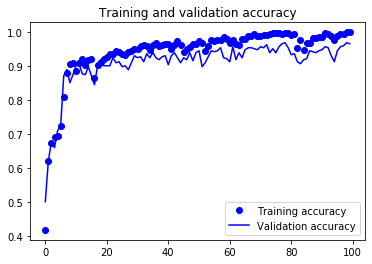

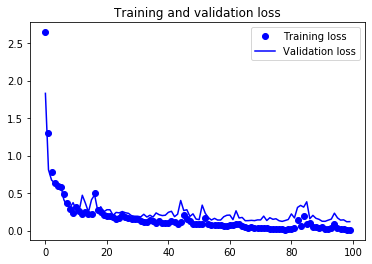

In [26]:
accuracy_cor = cor_train.history['accuracy']
val_accuracy_cor = cor_train.history['val_accuracy']
loss_cor = cor_train.history['loss']
val_loss_cor = cor_train.history['val_loss']
epochs_cor = range(len(accuracy_cor))
plt.plot(epochs_cor, accuracy_cor, 'bo', label='Training accuracy')
plt.plot(epochs_cor, val_accuracy_cor, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs_cor, loss_cor, 'bo', label='Training loss')
plt.plot(epochs_cor, val_loss_cor, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [27]:
predicted_classes_cor = model_cor.predict(x_cor_test)

In [28]:
predicted_classes_cor = np.argmax(np.round(predicted_classes_cor),axis=1)

In [29]:
predicted_classes_cor.shape, y_cor_test.shape

((427,), (427,))

411


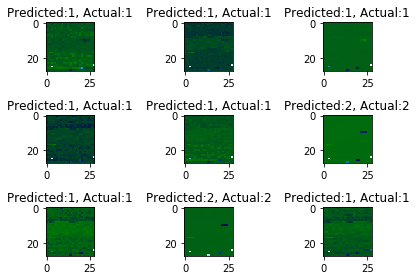

In [30]:
correct_cor = np.where(predicted_classes_cor==y_cor_test)[0]
print(len(correct_cor))
for i, correct_cor in enumerate(correct_cor[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_cor_test[correct_cor].reshape(28,28), cmap='ocean', interpolation='none')
    plt.title("Predicted:{}, Actual:{}".format(predicted_classes_cor[correct_cor], y_cor_test[correct_cor]))
    plt.tight_layout()

16


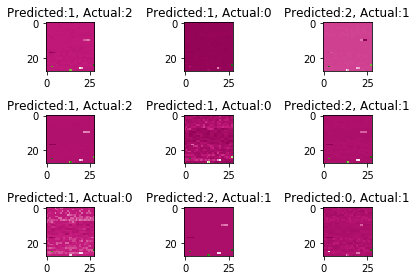

In [31]:
incorrect_cor = np.where(predicted_classes_cor!=y_cor_test)[0]
print(len(incorrect_cor))
for i, incorrect_cor in enumerate(incorrect_cor[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_cor_test[incorrect_cor].reshape(28,28), cmap='PiYG', interpolation='none')
    plt.title("Predicted:{}, Actual:{}".format(predicted_classes_cor[incorrect_cor], y_cor_test[incorrect_cor]))
    plt.tight_layout()

In [32]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_cor_test, predicted_classes_cor, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.99      0.97      0.98       153
     Class 1       0.93      0.96      0.94       142
     Class 2       0.97      0.96      0.97       132

    accuracy                           0.96       427
   macro avg       0.96      0.96      0.96       427
weighted avg       0.96      0.96      0.96       427



In [33]:
print("Test Accuracy: {:.3f}%".format(test_cor_eval[1] * 100))

Test Accuracy: 96.253%


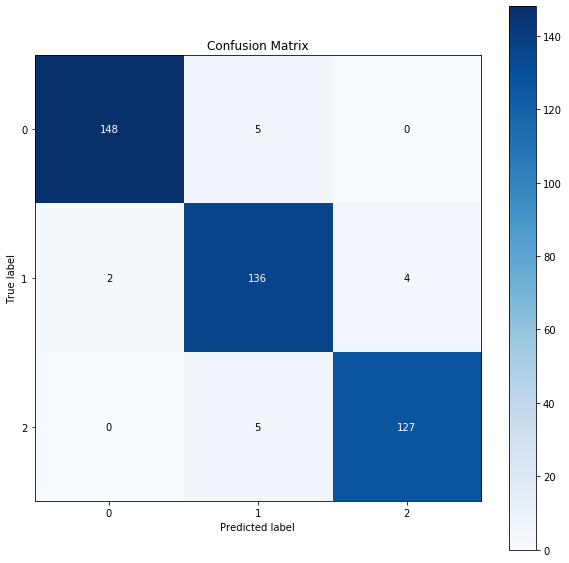

In [34]:
! pip install -q scikit-plot
import scikitplot as skplt
y_pred = np.array(list(map(lambda x: np.argmax(x), model_cor.predict(x_cor_test))))
skplt.metrics.plot_confusion_matrix(
    y_cor_test, 
    y_pred,
    figsize=(10,10))

# Deep Learning_CNN_Feature Selection using Chi2

In [35]:
eeg_data_chi=eeg_data_encoded[['mean_2_a',
 'mean_d_2_a2',
 'mean_d_7_a',
 'mean_d_12_a',
 'mean_d_17_a',
 'stddev_0_a',
 'stddev_2_a',
 'stddev_3_a',
 'min_2_a',
 'min_q_2_a',
 'min_q_7_a',
 'min_q_12_a',
 'min_q_17_a',
 'covmat_0_a',
 'covmat_13_a',
 'covmat_39_a',
 'covmat_52_a',
 'covmat_104_a',
 'covmat_117_a',
 'eigen_0_a',
 'eigen_1_a',
 'eigen_2_a',
 'eigen_3_a',
 'logm_0_a',
 'logm_1_a',
 'logm_2_a',
 'logm_8_a',
 'logm_9_a',
 'logm_24_a',
 'entropy0_a',
 'entropy2_a',
 'entropy3_a',
 'entropy4_a',
 'fft_0_a',
 'fft_1_a',
 'fft_2_a',
 'fft_3_a',
 'fft_4_a',
 'fft_5_a',
 'fft_10_a',
 'fft_11_a',
 'fft_14_a',
 'fft_15_a',
 'fft_16_a',
 'fft_17_a',
 'fft_18_a',
 'fft_19_a',
 'fft_20_a',
 'fft_21_a',
 'fft_24_a',
 'fft_25_a',
 'fft_30_a',
 'fft_31_a',
 'fft_34_a',
 'fft_35_a',
 'fft_36_a',
 'fft_39_a',
 'fft_40_a',
 'fft_41_a',
 'fft_44_a',
 'fft_45_a',
 'fft_46_a',
 'fft_49_a',
 'fft_50_a',
 'fft_51_a',
 'fft_54_a',
 'fft_55_a',
 'fft_56_a',
 'fft_59_a',
 'fft_60_a',
 'fft_61_a',
 'fft_62_a',
 'fft_63_a',
 'fft_64_a',
 'fft_65_a',
 'fft_66_a',
 'fft_69_a',
 'fft_70_a',
 'fft_71_a',
 'fft_74_a',
 'fft_75_a',
 'fft_76_a',
 'fft_77_a',
 'fft_78_a',
 'fft_79_a',
 'fft_80_a',
 'fft_81_a',
 'fft_84_a',
 'fft_85_a',
 'fft_86_a',
 'fft_87_a',
 'fft_88_a',
 'fft_89_a',
 'fft_90_a',
 'fft_91_a',
 'fft_92_a',
 'fft_93_a',
 'fft_94_a',
 'fft_95_a',
 'fft_100_a',
 'fft_105_a',
 'fft_106_a',
 'fft_109_a',
 'fft_110_a',
 'fft_115_a',
 'fft_120_a',
 'fft_125_a',
 'fft_130_a',
 'fft_135_a',
 'fft_145_a',
 'fft_150_a',
 'fft_155_a',
 'fft_165_a',
 'fft_167_a',
 'fft_168_a',
 'fft_170_a',
 'fft_175_a',
 'fft_177_a',
 'fft_178_a',
 'fft_180_a',
 'fft_182_a',
 'fft_183_a',
 'fft_185_a',
 'fft_195_a',
 'fft_196_a',
 'fft_199_a',
 'fft_201_a',
 'fft_204_a',
 'fft_210_a',
 'fft_216_a',
 'fft_219_a',
 'fft_221_a',
 'fft_224_a',
 'fft_225_a',
 'fft_226_a',
 'fft_229_a',
 'fft_231_a',
 'fft_234_a',
 'fft_236_a',
 'fft_239_a',
 'fft_240_a',
 'fft_241_a',
 'fft_244_a',
 'fft_246_a',
 'fft_249_a',
 'fft_250_a',
 'fft_251_a',
 'fft_254_a',
 'fft_255_a',
 'fft_256_a',
 'fft_259_a',
 'fft_260_a',
 'fft_261_a',
 'fft_264_a',
 'fft_265_a',
 'fft_266_a',
 'fft_269_a',
 'fft_270_a',
 'fft_271_a',
 'fft_274_a',
 'fft_276_a',
 'fft_279_a',
 'fft_280_a',
 'fft_281_a',
 'fft_284_a',
 'fft_285_a',
 'fft_286_a',
 'fft_289_a',
 'fft_291_a',
 'fft_294_a',
 'fft_295_a',
 'fft_296_a',
 'fft_299_a',
 'fft_300_a',
 'fft_301_a',
 'fft_302_a',
 'fft_303_a',
 'fft_304_a',
 'fft_305_a',
 'fft_306_a',
 'fft_309_a',
 'fft_310_a',
 'fft_311_a',
 'fft_314_a',
 'fft_315_a',
 'fft_316_a',
 'fft_319_a',
 'fft_320_a',
 'fft_321_a',
 'fft_324_a',
 'fft_325_a',
 'fft_326_a',
 'fft_329_a',
 'fft_330_a',
 'fft_331_a',
 'fft_334_a',
 'fft_335_a',
 'fft_336_a',
 'fft_339_a',
 'fft_340_a',
 'fft_345_a',
 'fft_346_a',
 'fft_349_a',
 'fft_350_a',
 'fft_355_a',
 'fft_356_a',
 'fft_359_a',
 'fft_360_a',
 'fft_361_a',
 'fft_364_a',
 'fft_365_a',
 'fft_366_a',
 'fft_369_a',
 'fft_370_a',
 'fft_375_a',
 'fft_376_a',
 'fft_379_a',
 'fft_380_a',
 'fft_385_a',
 'fft_386_a',
 'fft_389_a',
 'fft_390_a',
 'fft_391_a',
 'fft_392_a',
 'fft_393_a',
 'fft_394_a',
 'fft_395_a',
 'fft_396_a',
 'fft_399_a',
 'fft_400_a',
 'fft_405_a',
 'fft_406_a',
 'fft_409_a',
 'fft_410_a',
 'fft_411_a',
 'fft_414_a',
 'fft_415_a',
 'fft_416_a',
 'fft_419_a',
 'fft_420_a',
 'fft_421_a',
 'fft_424_a',
 'fft_425_a',
 'fft_426_a',
 'fft_429_a',
 'fft_430_a',
 'fft_431_a',
 'fft_434_a',
 'fft_435_a',
 'fft_436_a',
 'fft_437_a',
 'fft_438_a',
 'fft_439_a',
 'fft_440_a',
 'fft_441_a',
 'fft_444_a',
 'fft_445_a',
 'fft_446_a',
 'fft_449_a',
 'fft_450_a',
 'fft_451_a',
 'fft_452_a',
 'fft_453_a',
 'fft_454_a',
 'fft_455_a',
 'fft_456_a',
 'fft_459_a',
 'fft_460_a',
 'fft_461_a',
 'fft_462_a',
 'fft_463_a',
 'fft_464_a',
 'fft_465_a',
 'fft_466_a',
 'fft_467_a',
 'fft_468_a',
 'fft_469_a',
 'fft_470_a',
 'fft_475_a',
 'fft_480_a',
 'fft_481_a',
 'fft_482_a',
 'fft_483_a',
 'fft_484_a',
 'fft_485_a',
 'fft_490_a',
 'fft_495_a',
 'fft_500_a',
 'fft_505_a',
 'fft_510_a',
 'fft_520_a',
 'fft_525_a',
 'fft_530_a',
 'fft_540_a',
 'fft_542_a',
 'fft_543_a',
 'fft_545_a',
 'fft_550_a',
 'fft_555_a',
 'fft_557_a',
 'fft_558_a',
 'fft_560_a',
 'fft_570_a',
 'fft_571_a',
 'fft_574_a',
 'fft_576_a',
 'fft_579_a',
 'fft_585_a',
 'fft_591_a',
 'fft_594_a',
 'fft_596_a',
 'fft_599_a',
 'fft_600_a',
 'fft_601_a',
 'fft_604_a',
 'fft_606_a',
 'fft_609_a',
 'fft_611_a',
 'fft_614_a',
 'fft_615_a',
 'fft_616_a',
 'fft_619_a',
 'fft_621_a',
 'fft_624_a',
 'fft_625_a',
 'fft_626_a',
 'fft_629_a',
 'fft_630_a',
 'fft_631_a',
 'fft_634_a',
 'fft_635_a',
 'fft_636_a',
 'fft_639_a',
 'fft_640_a',
 'fft_641_a',
 'fft_644_a',
 'fft_645_a',
 'fft_646_a',
 'fft_649_a',
 'fft_651_a',
 'fft_654_a',
 'fft_655_a',
 'fft_656_a',
 'fft_659_a',
 'fft_660_a',
 'fft_661_a',
 'fft_664_a',
 'fft_666_a',
 'fft_669_a',
 'fft_670_a',
 'fft_671_a',
 'fft_674_a',
 'fft_675_a',
 'fft_676_a',
 'fft_677_a',
 'fft_678_a',
 'fft_679_a',
 'fft_680_a',
 'fft_681_a',
 'fft_684_a',
 'fft_685_a',
 'fft_686_a',
 'fft_689_a',
 'fft_690_a',
 'fft_691_a',
 'fft_694_a',
 'fft_695_a',
 'fft_696_a',
 'fft_699_a',
 'fft_701_a',
 'fft_704_a',
 'fft_705_a',
 'fft_706_a',
 'fft_709_a',
 'fft_710_a',
 'fft_711_a',
 'fft_714_a',
 'fft_716_a',
 'fft_719_a',
 'fft_720_a',
 'fft_721_a',
 'fft_724_a',
 'fft_725_a',
 'fft_726_a',
 'fft_729_a',
 'fft_730_a',
 'fft_731_a',
 'fft_734_a',
 'fft_735_a',
 'fft_736_a',
 'fft_739_a',
 'fft_740_a',
 'fft_741_a',
 'fft_744_a',
 'fft_745_a',
 'mean_2_b',
 'mean_d_2_b2',
 'mean_d_7_b',
 'mean_d_12_b',
 'mean_d_17_b',
 'stddev_0_b',
 'stddev_2_b',
 'stddev_3_b',
 'min_2_b',
 'min_q_2_b',
 'min_q_7_b',
 'min_q_12_b',
 'min_q_17_b',
 'covmat_0_b',
 'covmat_13_b',
 'covmat_39_b',
 'covmat_52_b',
 'covmat_104_b',
 'covmat_117_b',
 'eigen_0_b',
 'eigen_1_b',
 'eigen_2_b',
 'eigen_3_b',
 'logm_0_b',
 'logm_1_b',
 'logm_2_b',
 'logm_8_b',
 'logm_9_b',
 'logm_24_b',
 'entropy0_b',
 'entropy2_b',
 'entropy3_b',
 'entropy4_b',
 'fft_0_b',
 'fft_1_b',
 'fft_2_b',
 'fft_3_b',
 'fft_4_b',
 'fft_5_b',
 'fft_10_b',
 'fft_11_b',
 'fft_14_b',
 'fft_15_b',
 'fft_16_b',
 'fft_17_b',
 'fft_18_b',
 'fft_19_b',
 'fft_20_b',
 'fft_21_b',
 'fft_24_b',
 'fft_25_b',
 'fft_30_b',
 'fft_31_b',
 'fft_34_b',
 'fft_35_b',
 'fft_36_b',
 'fft_39_b',
 'fft_40_b',
 'fft_41_b',
 'fft_44_b',
 'fft_45_b',
 'fft_46_b',
 'fft_49_b',
 'fft_50_b',
 'fft_51_b',
 'fft_54_b',
 'fft_55_b',
 'fft_56_b',
 'fft_59_b',
 'fft_60_b',
 'fft_61_b',
 'fft_62_b',
 'fft_63_b',
 'fft_64_b',
 'fft_65_b',
 'fft_66_b',
 'fft_69_b',
 'fft_70_b',
 'fft_71_b',
 'fft_74_b',
 'fft_75_b',
 'fft_76_b',
 'fft_77_b',
 'fft_78_b',
 'fft_79_b',
 'fft_80_b',
 'fft_81_b',
 'fft_84_b',
 'fft_85_b',
 'fft_86_b',
 'fft_87_b',
 'fft_88_b',
 'fft_89_b',
 'fft_90_b',
 'fft_91_b',
 'fft_92_b',
 'fft_93_b',
 'fft_94_b',
 'fft_95_b',
 'fft_100_b',
 'fft_105_b',
 'fft_106_b',
 'fft_109_b',
 'fft_110_b',
 'fft_115_b',
 'fft_120_b',
 'fft_125_b',
 'fft_130_b',
 'fft_135_b',
 'fft_145_b',
 'fft_150_b',
 'fft_155_b',
 'fft_165_b',
 'fft_167_b',
 'fft_168_b',
 'fft_170_b',
 'fft_175_b',
 'fft_180_b',
 'fft_182_b',
 'fft_183_b',
 'fft_185_b',
 'fft_195_b',
 'fft_196_b',
 'fft_199_b',
 'fft_201_b',
 'fft_204_b',
 'fft_210_b',
 'fft_216_b',
 'fft_219_b',
 'fft_221_b',
 'fft_224_b',
 'fft_225_b',
 'fft_226_b',
 'fft_229_b',
 'fft_231_b',
 'fft_234_b',
 'fft_236_b',
 'fft_239_b',
 'fft_240_b',
 'fft_241_b',
 'fft_244_b',
 'fft_246_b',
 'fft_249_b',
 'fft_250_b',
 'fft_251_b',
 'fft_254_b',
 'fft_255_b',
 'fft_256_b',
 'fft_259_b',
 'fft_260_b',
 'fft_261_b',
 'fft_264_b',
 'fft_265_b',
 'fft_266_b',
 'fft_269_b',
 'fft_270_b',
 'fft_271_b',
 'fft_274_b',
 'fft_276_b',
 'fft_279_b',
 'fft_280_b',
 'fft_281_b',
 'fft_284_b',
 'fft_285_b',
 'fft_286_b',
 'fft_289_b',
 'fft_291_b',
 'fft_294_b',
 'fft_295_b',
 'fft_296_b',
 'fft_299_b',
 'fft_300_b',
 'fft_301_b',
 'fft_302_b',
 'fft_303_b',
 'fft_304_b',
 'fft_305_b',
 'fft_306_b',
 'fft_309_b',
 'fft_310_b',
 'fft_311_b',
 'fft_314_b',
 'fft_315_b',
 'fft_316_b',
 'fft_319_b',
 'fft_320_b',
 'fft_321_b',
 'fft_324_b',
 'fft_325_b',
 'fft_326_b',
 'fft_329_b',
 'fft_330_b',
 'fft_331_b',
 'fft_334_b',
 'fft_335_b',
 'fft_336_b',
 'fft_339_b',
 'fft_340_b',
 'fft_345_b',
 'fft_346_b',
 'fft_349_b',
 'fft_350_b',
 'fft_355_b',
 'fft_356_b',
 'fft_359_b',
 'fft_360_b',
 'fft_361_b',
 'fft_364_b',
 'fft_365_b',
 'fft_366_b',
 'fft_369_b',
 'fft_370_b',
 'fft_375_b',
 'fft_376_b',
 'fft_379_b',
 'fft_380_b',
 'fft_385_b',
 'fft_386_b',
 'fft_389_b',
 'fft_390_b',
 'fft_391_b',
 'fft_392_b',
 'fft_393_b',
 'fft_394_b',
 'fft_395_b',
 'fft_396_b',
 'fft_399_b',
 'fft_400_b',
 'fft_405_b',
 'fft_406_b',
 'fft_409_b',
 'fft_410_b',
 'fft_411_b',
 'fft_414_b',
 'fft_415_b',
 'fft_416_b',
 'fft_419_b',
 'fft_420_b',
 'fft_421_b',
 'fft_424_b',
 'fft_425_b',
 'fft_426_b',
 'fft_429_b',
 'fft_430_b',
 'fft_431_b',
 'fft_434_b',
 'fft_435_b',
 'fft_436_b',
 'fft_437_b',
 'fft_438_b',
 'fft_439_b',
 'fft_440_b',
 'fft_441_b',
 'fft_444_b',
 'fft_445_b',
 'fft_446_b',
 'fft_449_b',
 'fft_450_b',
 'fft_451_b',
 'fft_452_b',
 'fft_453_b',
 'fft_454_b',
 'fft_455_b',
 'fft_456_b',
 'fft_459_b',
 'fft_460_b',
 'fft_461_b',
 'fft_462_b',
 'fft_463_b',
 'fft_464_b',
 'fft_465_b',
 'fft_466_b',
 'fft_467_b',
 'fft_468_b',
 'fft_469_b',
 'fft_470_b',
 'fft_475_b',
 'fft_480_b',
 'fft_481_b',
 'fft_482_b',
 'fft_483_b',
 'fft_484_b',
 'fft_485_b',
 'fft_490_b',
 'fft_495_b',
 'fft_500_b',
 'fft_505_b',
 'fft_510_b',
 'fft_525_b',
 'fft_530_b',
 'fft_540_b',
 'fft_542_b',
 'fft_543_b',
 'fft_545_b',
 'fft_550_b',
 'fft_555_b',
 'fft_557_b',
 'fft_558_b',
 'fft_560_b',
 'fft_570_b',
 'fft_571_b',
 'fft_574_b',
 'fft_576_b',
 'fft_579_b',
 'fft_585_b',
 'fft_591_b',
 'fft_594_b',
 'fft_596_b',
 'fft_599_b',
 'fft_600_b',
 'fft_601_b',
 'fft_604_b',
 'fft_606_b',
 'fft_609_b',
 'fft_611_b',
 'fft_614_b',
 'fft_615_b',
 'fft_616_b',
 'fft_619_b',
 'fft_621_b',
 'fft_624_b',
 'fft_625_b',
 'fft_626_b',
 'fft_629_b',
 'fft_630_b',
 'fft_631_b',
 'fft_634_b',
 'fft_635_b',
 'fft_636_b',
 'fft_639_b',
 'fft_640_b',
 'fft_641_b',
 'fft_644_b',
 'fft_645_b',
 'fft_646_b',
 'fft_649_b',
 'fft_651_b',
 'fft_654_b',
 'fft_655_b',
 'fft_656_b',
 'fft_659_b',
 'fft_660_b',
 'fft_661_b',
 'fft_664_b',
 'fft_666_b',
 'fft_669_b',
 'fft_670_b',
 'fft_671_b',
 'fft_674_b',
 'fft_675_b',
 'fft_676_b',
 'fft_677_b',
 'fft_678_b',
 'fft_679_b',
 'fft_680_b',
 'fft_681_b',
 'fft_684_b',
 'fft_685_b',
 'fft_686_b',
 'fft_689_b',
 'fft_690_b',
 'fft_691_b',
 'fft_694_b',
 'fft_696_b',
 'fft_699_b',
 'fft_701_b',
 'fft_704_b',
 'fft_705_b',
 'fft_706_b',
 'fft_709_b',
 'fft_710_b',
 'fft_711_b',
 'fft_714_b',
 'fft_720_b',
 'fft_721_b',
 'fft_724_b',
 'fft_725_b',
 'fft_726_b',
 'fft_729_b',
 'fft_730_b',
 'fft_731_b',
 'fft_734_b',
 'fft_735_b',
 'fft_736_b',
 'fft_739_b',
 'fft_740_b',
 'fft_741_b',
 'fft_744_b',
 'fft_745_b','label']]

In [36]:
eeg_data_chi.head()

,mean_2_a,mean_d_2_a2,mean_d_7_a,mean_d_12_a,mean_d_17_a,stddev_0_a,stddev_2_a,stddev_3_a,min_2_a,min_q_2_a,...,fft_731_b,fft_734_b,fft_735_b,fft_736_b,fft_739_b,fft_740_b,fft_741_b,fft_744_b,fft_745_b,label
0,-356.0,-353.0,-343.0,-368.0,-359.0,28.1,203.0,39.90,-727.000,-677.0,...,509.000,509.000,-399.0,374.0,374.0,74.3,23.5,23.5,-215.0,2
1,32.0,29.6,31.5,33.2,33.8,7.1,10.3,6.51,-0.705,11.1,...,-0.968,-0.968,97.4,-19.0,-19.0,130.0,-23.3,-23.3,182.0,0
2,-416.0,-441.0,-481.0,-408.0,-335.0,70.4,167.0,71.50,-844.000,-707.0,...,255.000,255.000,-177.0,159.0,159.0,-534.0,462.0,462.0,-267.0,1
3,-143.0,-148.0,-147.0,-142.0,-135.0,19.7,257.0,9.10,-819.000,-671.0,...,-113.000,-113.000,245.0,-61.9,-61.9,-183.0,299.0,299.0,132.0,1
4,45.2,43.7,43.7,60.3,33.6,58.0,20.9,61.20,-9.640,12.2,...,9.940,9.940,172.0,15.9,15.9,114.0,12.0,12.0,119.0,0


In [37]:
eeg_data_chi.iloc[3,1:].values.reshape(28,28).astype('uint8')

array([[108, 109, 114, 121,  19,   1,   9, 205,  97, 211, 205,  56,  78,
         66,   2, 140, 192, 144,  96, 232, 146, 156,   7,   5, 233,  11,
         10,   2],
       [  0,   0,   0,   0, 119,   6,  10,  10,   6, 179,  85,  39,  39,
        209, 209,  15,  15, 209, 237, 193, 193, 205,  57, 116, 116, 223,
        252, 252],
       [239, 210, 210, 210, 209, 209, 148,  22,  22, 247,  93,  93, 138,
        202, 175, 175, 202, 140, 125, 125,  46, 208, 208,  61, 177,   6,
          6, 177],
       [ 81, 242, 242,  13, 230,  22,  22, 230, 156,   4,  15,  15,   4,
        216,  33,  61,  20,  20, 124, 251,   2, 123, 231, 145,  60, 102,
         15, 114],
       [178, 178, 128, 200,  29,  29,  19,   4,   4, 107, 155, 226, 226,
        181, 181, 215, 139, 139, 218, 218,  97, 238, 238, 155, 155,  80,
         80, 235],
       [ 87,  87, 193, 193,  48, 168, 168,  47, 169, 169, 200, 254, 254,
        102,  42,  42, 196,  41,  41, 102, 102,   5, 228, 228,  25,  21,
         21,  55],
       [ 5

In [38]:
x_chi = eeg_data_chi.iloc[:,1:].values.reshape(len(eeg_data_chi),28,28,1)
y_chi = eeg_data_chi.iloc[:,-1].values

In [39]:
x_chi_train, x_chi_test, y_chi_train, y_chi_test = train_test_split(x_chi,y_chi,test_size=0.2,random_state=4)

In [40]:
print('Training data shape : ', x_chi_train.shape, y_chi_train.shape)

print('Testing data shape : ', x_chi_test.shape, y_chi_test.shape)

Training data shape :  (1705, 28, 28, 1) (1705,)
Testing data shape :  (427, 28, 28, 1) (427,)


In [41]:
classes = np.unique(y_chi_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  3
Output classes :  [0 1 2]


In [42]:
x_chi_train = x_chi_train.reshape(-1, 28,28, 1)
x_chi_test = x_chi_test.reshape(-1, 28,28, 1)
x_chi_train.shape, x_chi_test.shape

((1705, 28, 28, 1), (427, 28, 28, 1))

In [43]:
x_chi_train = x_chi_train.astype('float32')
x_chi_test = x_chi_test.astype('float32')
x_chi_train = x_chi_train / 255.
x_chi_test = x_chi_test / 255.

In [44]:
train_chi_Y_one_hot = to_categorical(y_chi_train)
test_chi_Y_one_hot = to_categorical(y_chi_test)

# Display the change for category label using one-hot encoding
print('Original label:', y_chi_train[0])
print('After conversion to one-hot:', train_chi_Y_one_hot[0])

Original label: 0
After conversion to one-hot: [1. 0. 0.]


In [45]:
from sklearn.model_selection import train_test_split
train_chi_X,valid_chi_X,train_chi_label,valid_chi_label = train_test_split(x_chi_train, train_chi_Y_one_hot, test_size=0.2, random_state=13)

In [46]:
train_chi_X.shape,valid_chi_X.shape,train_chi_label.shape,valid_chi_label.shape

((1364, 28, 28, 1), (341, 28, 28, 1), (1364, 3), (341, 3))

In [47]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [48]:
batch_size = 64
epochs = 100
num_classes = 3

In [49]:
model_chi = Sequential()
model_chi.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
model_chi.add(LeakyReLU(alpha=0.1))
model_chi.add(MaxPooling2D((2, 2),padding='same'))
model_chi.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model_chi.add(LeakyReLU(alpha=0.1))
model_chi.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model_chi.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model_chi.add(LeakyReLU(alpha=0.1))                  
model_chi.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model_chi.add(Flatten())
model_chi.add(Dense(128, activation='linear'))
model_chi.add(LeakyReLU(alpha=0.1))                  
model_chi.add(Dense(num_classes, activation='softmax'))

In [50]:
model_chi.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [51]:
model_chi.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 128)        

In [52]:
chi_train = model_chi.fit(train_chi_X, train_chi_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_chi_X, valid_chi_label))

Train on 1364 samples, validate on 341 samples
Epoch 1/100
1364/1364 [==============================] - 3s 3ms/step - loss: 2.0098 - accuracy: 0.4677 - val_loss: 1.4011 - val_accuracy: 0.5660
Epoch 2/100
1364/1364 [==============================] - 3s 2ms/step - loss: 0.9977 - accuracy: 0.6444 - val_loss: 0.7042 - val_accuracy: 0.6891
Epoch 3/100
1364/1364 [==============================] - 3s 2ms/step - loss: 0.6485 - accuracy: 0.6884 - val_loss: 0.6293 - val_accuracy: 0.6804
Epoch 4/100
1364/1364 [==============================] - 3s 2ms/step - loss: 0.5687 - accuracy: 0.7038 - val_loss: 0.4842 - val_accuracy: 0.8094
Epoch 5/100
1364/1364 [==============================] - 3s 2ms/step - loss: 0.4696 - accuracy: 0.8453 - val_loss: 0.4004 - val_accuracy: 0.8446
Epoch 6/100
1364/1364 [==============================] - 3s 2ms/step - loss: 0.3038 - accuracy: 0.8908 - val_loss: 0.3446 - val_accuracy: 0.8827
Epoch 7/100
1364/1364 [==============================] - 3s 2ms/step - loss: 0.2633

In [53]:
test_chi_eval = model_chi.evaluate(x_chi_test, test_chi_Y_one_hot, verbose=0)

In [54]:
print('Test loss:', test_chi_eval[0])
print('Test accuracy:', test_chi_eval[1])

Test loss: 0.07375181807244341
Test accuracy: 0.9742388725280762


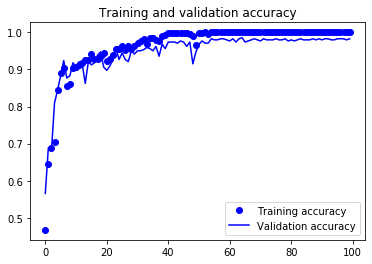

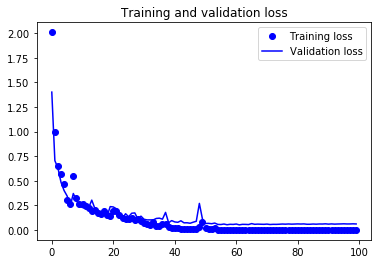

In [55]:
accuracy_chi = chi_train.history['accuracy']
val_accuracy_chi = chi_train.history['val_accuracy']
loss_chi = chi_train.history['loss']
val_loss_chi = chi_train.history['val_loss']
epochs_chi = range(len(accuracy_chi))
plt.plot(epochs_chi, accuracy_chi, 'bo', label='Training accuracy')
plt.plot(epochs_chi, val_accuracy_chi, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs_chi, loss_chi, 'bo', label='Training loss')
plt.plot(epochs_chi, val_loss_chi, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [56]:
predicted_classes_chi = model_chi.predict(x_chi_test)

In [57]:
predicted_classes_chi = np.argmax(np.round(predicted_classes_chi),axis=1)

In [58]:
predicted_classes_chi.shape, y_chi_test.shape

((427,), (427,))

416


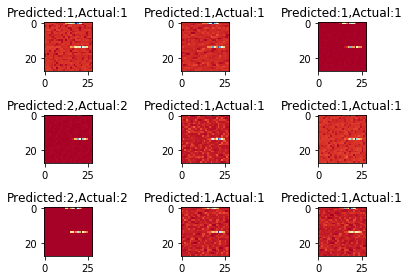

In [59]:
correct_chi = np.where(predicted_classes_chi==y_chi_test)[0]
print(len(correct_chi))
for i, correct_chi in enumerate(correct_chi[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_chi_test[correct_chi].reshape(28,28), cmap='RdYlBu', interpolation='none')
    plt.title("Predicted:{},Actual:{}".format(predicted_classes_chi[correct_chi], y_chi_test[correct_chi]))
    plt.tight_layout()

11


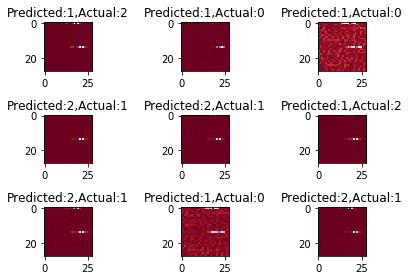

In [60]:
incorrect_chi = np.where(predicted_classes_chi!=y_chi_test)[0]
print(len(incorrect_chi))
for i, incorrect_chi in enumerate(incorrect_chi[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_chi_test[incorrect_chi].reshape(28,28), cmap='RdBu', interpolation='none')
    plt.title("Predicted:{},Actual:{}".format(predicted_classes_chi[incorrect_chi], y_chi_test[incorrect_chi]))
    plt.tight_layout()

In [61]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_chi_test, predicted_classes_chi, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       1.00      0.98      0.99       153
     Class 1       0.96      0.96      0.96       142
     Class 2       0.96      0.98      0.97       132

    accuracy                           0.97       427
   macro avg       0.97      0.97      0.97       427
weighted avg       0.97      0.97      0.97       427



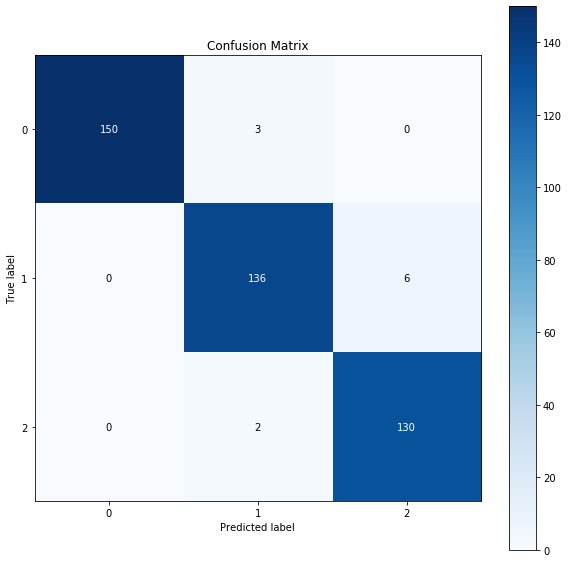

In [62]:
! pip install -q scikit-plot
import scikitplot as skplt
y_pred = np.array(list(map(lambda x: np.argmax(x), model_chi.predict(x_chi_test))))
skplt.metrics.plot_confusion_matrix(
    y_chi_test, 
    y_pred,
    figsize=(10,10))

# Deep Learning_CNN_Feature Selected using RFE

In [63]:
eeg_data_rfe=eeg_data_encoded[['# mean_0_a',
 'mean_1_a',
 'mean_3_a',
 'mean_4_a',
 'mean_d_0_a2',
 'mean_d_3_a2',
 'mean_d_5_a',
 'mean_d_8_a',
 'mean_d_9_a',
 'mean_d_10_a',
 'mean_d_13_a',
 'mean_d_15_a',
 'mean_d_18_a',
 'mean_d_23_a',
 'stddev_1_a',
 'stddev_2_a',
 'stddev_3_a',
 'moments_14_a',
 'max_1_a',
 'max_2_a',
 'max_3_a',
 'max_4_a',
 'max_q_1_a',
 'max_q_2_a',
 'max_q_3_a',
 'max_q_4_a',
 'max_q_7_a',
 'max_q_8_a',
 'max_q_11_a',
 'max_q_12_a',
 'max_q_13_a',
 'max_q_14_a',
 'max_q_17_a',
 'max_q_18_a',
 'max_q_22_a',
 'max_q_47_a',
 'min_1_a',
 'min_2_a',
 'min_3_a',
 'min_4_a',
 'min_d_0_a',
 'min_d_3_a',
 'min_q_0_a',
 'min_q_1_a',
 'min_q_2_a',
 'min_q_3_a',
 'min_q_5_a',
 'min_q_6_a',
 'min_q_7_a',
 'min_q_8_a',
 'min_q_9_a',
 'min_q_11_a',
 'min_q_12_a',
 'min_q_13_a',
 'min_q_15_a',
 'min_q_16_a',
 'min_q_17_a',
 'min_q_18_a',
 'min_q_23_a',
 'min_q_37_a',
 'covmat_0_a',
 'covmat_1_a',
 'covmat_5_a',
 'covmat_7_a',
 'covmat_8_a',
 'covmat_12_a',
 'covmat_13_a',
 'covmat_19_a',
 'covmat_20_a',
 'covmat_31_a',
 'covmat_44_a',
 'covmat_52_a',
 'covmat_53_a',
 'covmat_56_a',
 'covmat_57_a',
 'covmat_60_a',
 'covmat_64_a',
 'covmat_70_a',
 'covmat_78_a',
 'covmat_79_a',
 'covmat_84_a',
 'covmat_85_a',
 'covmat_86_a',
 'covmat_90_a',
 'covmat_96_a',
 'covmat_97_a',
 'covmat_99_a',
 'covmat_100_a',
 'covmat_104_a',
 'covmat_112_a',
 'covmat_117_a',
 'covmat_118_a',
 'covmat_125_a',
 'covmat_129_a',
 'covmat_130_a',
 'eigen_0_a',
 'eigen_1_a',
 'eigen_2_a',
 'eigen_4_a',
 'eigen_5_a',
 'eigen_6_a',
 'logm_0_a',
 'logm_1_a',
 'logm_2_a',
 'logm_3_a',
 'logm_4_a',
 'logm_5_a',
 'logm_6_a',
 'logm_7_a',
 'logm_8_a',
 'logm_9_a',
 'logm_10_a',
 'logm_11_a',
 'logm_12_a',
 'logm_13_a',
 'logm_14_a',
 'logm_15_a',
 'logm_19_a',
 'logm_22_a',
 'logm_23_a',
 'logm_24_a',
 'logm_25_a',
 'logm_28_a',
 'logm_29_a',
 'logm_30_a',
 'logm_31_a',
 'logm_33_a',
 'logm_34_a',
 'logm_35_a',
 'logm_36_a',
 'logm_37_a',
 'logm_40_a',
 'logm_41_a',
 'logm_42_a',
 'logm_43_a',
 'logm_45_a',
 'logm_48_a',
 'logm_50_a',
 'logm_51_a',
 'logm_52_a',
 'logm_53_a',
 'logm_54_a',
 'logm_55_a',
 'logm_57_a',
 'logm_58_a',
 'logm_59_a',
 'logm_61_a',
 'logm_62_a',
 'logm_64_a',
 'logm_66_a',
 'logm_68_a',
 'logm_70_a',
 'logm_72_a',
 'logm_73_a',
 'entropy0_a',
 'entropy2_a',
 'entropy3_a',
 'correlate_3_a',
 'correlate_7_a',
 'correlate_11_a',
 'correlate_12_a',
 'correlate_14_a',
 'correlate_16_a',
 'correlate_17_a',
 'correlate_18_a',
 'correlate_19_a',
 'correlate_20_a',
 'correlate_22_a',
 'correlate_23_a',
 'correlate_24_a',
 'correlate_26_a',
 'correlate_27_a',
 'correlate_29_a',
 'correlate_31_a',
 'correlate_32_a',
 'correlate_39_a',
 'correlate_40_a',
 'correlate_41_a',
 'correlate_44_a',
 'correlate_53_a',
 'correlate_57_a',
 'correlate_59_a',
 'correlate_65_a',
 'correlate_67_a',
 'correlate_68_a',
 'correlate_71_a',
 'correlate_73_a',
 'fft_0_a',
 'fft_1_a',
 'fft_4_a',
 'fft_5_a',
 'fft_6_a',
 'fft_9_a',
 'fft_10_a',
 'fft_15_a',
 'fft_17_a',
 'fft_18_a',
 'fft_20_a',
 'fft_30_a',
 'fft_31_a',
 'fft_32_a',
 'fft_33_a',
 'fft_34_a',
 'fft_35_a',
 'fft_40_a',
 'fft_41_a',
 'fft_44_a',
 'fft_45_a',
 'fft_47_a',
 'fft_48_a',
 'fft_51_a',
 'fft_54_a',
 'fft_57_a',
 'fft_58_a',
 'fft_61_a',
 'fft_64_a',
 'fft_66_a',
 'fft_69_a',
 'fft_70_a',
 'fft_75_a',
 'fft_77_a',
 'fft_78_a',
 'fft_80_a',
 'fft_90_a',
 'fft_92_a',
 'fft_93_a',
 'fft_95_a',
 'fft_100_a',
 'fft_105_a',
 'fft_107_a',
 'fft_108_a',
 'fft_110_a',
 'fft_111_a',
 'fft_114_a',
 'fft_115_a',
 'fft_120_a',
 'fft_121_a',
 'fft_124_a',
 'fft_125_a',
 'fft_130_a',
 'fft_137_a',
 'fft_138_a',
 'fft_140_a',
 'fft_165_a',
 'fft_175_a',
 'fft_182_a',
 'fft_183_a',
 'fft_185_a',
 'fft_187_a',
 'fft_188_a',
 'fft_197_a',
 'fft_198_a',
 'fft_200_a',
 'fft_205_a',
 'fft_206_a',
 'fft_209_a',
 'fft_212_a',
 'fft_213_a',
 'fft_215_a',
 'fft_216_a',
 'fft_219_a',
 'fft_221_a',
 'fft_224_a',
 'fft_225_a',
 'fft_242_a',
 'fft_243_a',
 'fft_250_a',
 'fft_251_a',
 'fft_254_a',
 'fft_260_a',
 'fft_270_a',
 'fft_275_a',
 'fft_280_a',
 'fft_285_a',
 'fft_286_a',
 'fft_289_a',
 'fft_290_a',
 'fft_295_a',
 'fft_302_a',
 'fft_303_a',
 'fft_307_a',
 'fft_308_a',
 'fft_311_a',
 'fft_314_a',
 'fft_315_a',
 'fft_316_a',
 'fft_319_a',
 'fft_320_a',
 'fft_331_a',
 'fft_334_a',
 'fft_335_a',
 'fft_336_a',
 'fft_339_a',
 'fft_340_a',
 'fft_346_a',
 'fft_349_a',
 'fft_350_a',
 'fft_355_a',
 'fft_356_a',
 'fft_359_a',
 'fft_360_a',
 'fft_365_a',
 'fft_370_a',
 'fft_375_a',
 'fft_376_a',
 'fft_379_a',
 'fft_381_a',
 'fft_384_a',
 'fft_385_a',
 'fft_392_a',
 'fft_393_a',
 'fft_395_a',
 'fft_405_a',
 'fft_407_a',
 'fft_408_a',
 'fft_415_a',
 'fft_426_a',
 'fft_429_a',
 'fft_432_a',
 'fft_433_a',
 'fft_441_a',
 'fft_444_a',
 'fft_445_a',
 'fft_452_a',
 'fft_453_a',
 'fft_465_a',
 'fft_467_a',
 'fft_468_a',
 'fft_470_a',
 'fft_475_a',
 'fft_477_a',
 'fft_478_a',
 'fft_486_a',
 'fft_489_a',
 'fft_495_a',
 'fft_500_a',
 'fft_505_a',
 'fft_515_a',
 'fft_531_a',
 'fft_534_a',
 'fft_540_a',
 'fft_550_a',
 'fft_557_a',
 'fft_558_a',
 'fft_560_a',
 'fft_572_a',
 'fft_573_a',
 'fft_575_a',
 'fft_580_a',
 'fft_581_a',
 'fft_584_a',
 'fft_596_a',
 'fft_601_a',
 'fft_604_a',
 'fft_617_a',
 'fft_618_a',
 'fft_625_a',
 'fft_626_a',
 'fft_629_a',
 'fft_635_a',
 'fft_655_a',
 'fft_657_a',
 'fft_658_a',
 'fft_660_a',
 'fft_661_a',
 'fft_664_a',
 'fft_665_a',
 'fft_666_a',
 'fft_669_a',
 'fft_675_a',
 'fft_677_a',
 'fft_678_a',
 'fft_682_a',
 'fft_683_a',
 'fft_686_a',
 'fft_689_a',
 'fft_690_a',
 'fft_691_a',
 'fft_694_a',
 'fft_706_a',
 'fft_709_a',
 'fft_725_a',
 'fft_730_a',
 'fft_735_a',
 'mean_0_b',
 'mean_1_b',
 'mean_3_b',
 'mean_4_b',
 'mean_d_0_b2',
 'mean_d_3_b2',
 'mean_d_5_b',
 'mean_d_8_b',
 'mean_d_10_b',
 'mean_d_13_b',
 'mean_d_15_b',
 'mean_d_18_b',
 'mean_d_19_b',
 'mean_d_25_b',
 'mean_d_30_b',
 'mean_d_47_b',
 'stddev_1_b',
 'stddev_2_b',
 'stddev_3_b',
 'stddev_d_2_b',
 'max_1_b',
 'max_2_b',
 'max_3_b',
 'max_4_b',
 'max_d_2_b',
 'max_q_1_b',
 'max_q_2_b',
 'max_q_3_b',
 'max_q_4_b',
 'max_q_7_b',
 'max_q_8_b',
 'max_q_11_b',
 'max_q_12_b',
 'max_q_13_b',
 'max_q_16_b',
 'max_q_17_b',
 'max_q_18_b',
 'max_q_22_b',
 'max_q_24_b',
 'max_q_47_b',
 'max_q_49_b',
 'min_1_b',
 'min_2_b',
 'min_3_b',
 'min_4_b',
 'min_q_1_b',
 'min_q_2_b',
 'min_q_3_b',
 'min_q_5_b',
 'min_q_6_b',
 'min_q_7_b',
 'min_q_8_b',
 'min_q_10_b',
 'min_q_11_b',
 'min_q_12_b',
 'min_q_13_b',
 'min_q_15_b',
 'min_q_16_b',
 'min_q_17_b',
 'min_q_18_b',
 'min_q_19_b',
 'min_q_35_b',
 'min_q_42_b',
 'covmat_0_b',
 'covmat_1_b',
 'covmat_5_b',
 'covmat_8_b',
 'covmat_12_b',
 'covmat_13_b',
 'covmat_17_b',
 'covmat_19_b',
 'covmat_20_b',
 'covmat_28_b',
 'covmat_30_b',
 'covmat_31_b',
 'covmat_44_b',
 'covmat_50_b',
 'covmat_52_b',
 'covmat_53_b',
 'covmat_56_b',
 'covmat_57_b',
 'covmat_60_b',
 'covmat_61_b',
 'covmat_64_b',
 'covmat_74_b',
 'covmat_78_b',
 'covmat_85_b',
 'covmat_86_b',
 'covmat_96_b',
 'covmat_97_b',
 'covmat_99_b',
 'covmat_100_b',
 'covmat_104_b',
 'covmat_112_b',
 'covmat_117_b',
 'covmat_118_b',
 'covmat_129_b',
 'eigen_0_b',
 'eigen_1_b',
 'eigen_2_b',
 'eigen_4_b',
 'eigen_5_b',
 'eigen_10_b',
 'eigen_11_b',
 'logm_0_b',
 'logm_1_b',
 'logm_2_b',
 'logm_3_b',
 'logm_4_b',
 'logm_5_b',
 'logm_6_b',
 'logm_7_b',
 'logm_8_b',
 'logm_9_b',
 'logm_10_b',
 'logm_11_b',
 'logm_12_b',
 'logm_13_b',
 'logm_14_b',
 'logm_15_b',
 'logm_18_b',
 'logm_19_b',
 'logm_21_b',
 'logm_22_b',
 'logm_23_b',
 'logm_24_b',
 'logm_26_b',
 'logm_27_b',
 'logm_30_b',
 'logm_31_b',
 'logm_33_b',
 'logm_34_b',
 'logm_35_b',
 'logm_36_b',
 'logm_37_b',
 'logm_42_b',
 'logm_43_b',
 'logm_45_b',
 'logm_48_b',
 'logm_50_b',
 'logm_51_b',
 'logm_52_b',
 'logm_53_b',
 'logm_54_b',
 'logm_56_b',
 'logm_57_b',
 'logm_58_b',
 'logm_59_b',
 'logm_61_b',
 'logm_62_b',
 'logm_63_b',
 'logm_64_b',
 'logm_66_b',
 'logm_68_b',
 'logm_70_b',
 'logm_72_b',
 'logm_75_b',
 'logm_76_b',
 'logm_77_b',
 'entropy0_b',
 'entropy3_b',
 'correlate_1_b',
 'correlate_3_b',
 'correlate_4_b',
 'correlate_7_b',
 'correlate_11_b',
 'correlate_14_b',
 'correlate_16_b',
 'correlate_17_b',
 'correlate_19_b',
 'correlate_20_b',
 'correlate_22_b',
 'correlate_24_b',
 'correlate_26_b',
 'correlate_30_b',
 'correlate_31_b',
 'correlate_32_b',
 'correlate_39_b',
 'correlate_40_b',
 'correlate_41_b',
 'correlate_44_b',
 'correlate_45_b',
 'correlate_51_b',
 'correlate_53_b',
 'correlate_57_b',
 'correlate_61_b',
 'correlate_65_b',
 'correlate_67_b',
 'correlate_71_b',
 'correlate_73_b',
 'fft_0_b',
 'fft_1_b',
 'fft_4_b',
 'fft_6_b',
 'fft_9_b',
 'fft_17_b',
 'fft_18_b',
 'fft_20_b',
 'fft_30_b',
 'fft_32_b',
 'fft_33_b',
 'fft_40_b',
 'fft_47_b',
 'fft_48_b',
 'fft_51_b',
 'fft_54_b',
 'fft_57_b',
 'fft_58_b',
 'fft_66_b',
 'fft_69_b',
 'fft_70_b',
 'fft_77_b',
 'fft_78_b',
 'fft_81_b',
 'fft_84_b',
 'fft_90_b',
 'fft_100_b',
 'fft_102_b',
 'fft_103_b',
 'fft_110_b',
 'fft_111_b',
 'fft_114_b',
 'fft_115_b',
 'fft_120_b',
 'fft_125_b',
 'fft_130_b',
 'fft_140_b',
 'fft_156_b',
 'fft_159_b',
 'fft_165_b',
 'fft_185_b',
 'fft_197_b',
 'fft_198_b',
 'fft_200_b',
 'fft_205_b',
 'fft_206_b',
 'fft_209_b',
 'fft_216_b',
 'fft_219_b',
 'fft_250_b',
 'fft_251_b',
 'fft_254_b',
 'fft_260_b',
 'fft_265_b',
 'fft_280_b',
 'fft_282_b',
 'fft_283_b',
 'fft_285_b',
 'fft_286_b',
 'fft_289_b',
 'fft_290_b',
 'fft_291_b',
 'fft_294_b',
 'fft_300_b',
 'fft_302_b',
 'fft_303_b',
 'fft_307_b',
 'fft_308_b',
 'fft_311_b',
 'fft_314_b',
 'fft_315_b',
 'fft_316_b',
 'fft_317_b',
 'fft_318_b',
 'fft_319_b',
 'fft_320_b',
 'fft_331_b',
 'fft_334_b',
 'fft_355_b',
 'fft_356_b',
 'fft_359_b',
 'fft_360_b',
 'fft_381_b',
 'fft_384_b',
 'fft_390_b',
 'fft_392_b',
 'fft_393_b',
 'fft_400_b',
 'fft_405_b',
 'fft_406_b',
 'fft_407_b',
 'fft_408_b',
 'fft_409_b',
 'fft_415_b',
 'fft_422_b',
 'fft_423_b',
 'fft_432_b',
 'fft_433_b',
 'fft_441_b',
 'fft_442_b',
 'fft_443_b',
 'fft_444_b',
 'fft_445_b',
 'fft_450_b',
 'fft_452_b',
 'fft_453_b',
 'fft_456_b',
 'fft_459_b',
 'fft_465_b',
 'fft_467_b',
 'fft_468_b',
 'fft_472_b',
 'fft_473_b',
 'fft_475_b',
 'fft_477_b',
 'fft_478_b',
 'fft_482_b',
 'fft_483_b',
 'fft_486_b',
 'fft_489_b',
 'fft_490_b',
 'fft_495_b',
 'fft_497_b',
 'fft_498_b',
 'fft_500_b',
 'fft_505_b',
 'fft_515_b',
 'fft_530_b',
 'fft_555_b',
 'fft_557_b',
 'fft_558_b',
 'fft_566_b',
 'fft_567_b',
 'fft_568_b',
 'fft_569_b',
 'fft_571_b',
 'fft_572_b',
 'fft_573_b',
 'fft_574_b',
 'fft_575_b',
 'fft_580_b',
 'fft_581_b',
 'fft_584_b',
 'fft_596_b',
 'fft_599_b',
 'fft_616_b',
 'fft_619_b',
 'fft_620_b',
 'fft_625_b',
 'fft_626_b',
 'fft_629_b',
 'fft_630_b',
 'fft_635_b',
 'fft_640_b',
 'fft_645_b',
 'fft_650_b',
 'fft_651_b',
 'fft_654_b',
 'fft_655_b',
 'fft_656_b',
 'fft_657_b',
 'fft_658_b',
 'fft_659_b',
 'fft_660_b',
 'fft_661_b',
 'fft_664_b',
 'fft_665_b',
 'fft_666_b',
 'fft_667_b',
 'fft_668_b',
 'fft_669_b',
 'fft_670_b',
 'fft_675_b',
 'fft_676_b',
 'fft_677_b',
 'fft_678_b',
 'fft_679_b',
 'fft_680_b',
 'fft_682_b',
 'fft_683_b',
 'fft_686_b',
 'fft_689_b',
 'fft_690_b',
 'fft_691_b',
 'fft_692_b',
 'fft_693_b',
 'fft_694_b',
 'fft_695_b',
 'fft_696_b',
 'fft_699_b',
 'fft_710_b',
 'fft_711_b',
 'fft_714_b',
 'fft_720_b',
 'fft_722_b',
 'fft_723_b',
 'fft_725_b',
 'fft_730_b',
 'fft_731_b',
 'fft_734_b',
 'fft_735_b',
 'fft_736_b',
 'fft_737_b',
 'fft_738_b',
 'fft_739_b',
 'fft_741_b',
 'fft_744_b',
 'fft_745_b',
 'fft_746_b',
 'fft_749_b','label']]

In [64]:
eeg_data_rfe.iloc[3,1:].values.reshape(28,28).astype('uint8')

array([[ 31,  19,  24,  17,  20,  13,  16,  27,  15,  20,  13,  21,   3,
          2,   1,   9,  64,  42, 189,  42, 100,  36, 149,  37,  95, 160,
         42,  42],
       [189,  35,  91, 152,  41, 246,  37,  25, 205, 250, 203,   2,  10,
        233,  26,  97, 252, 235,  26, 211, 250, 220,  25, 205,   4, 235,
         25,  56],
       [  4,   2,   5,  78, 176, 171,  95, 104, 176,  66,  74,  72,  18,
        146, 140,  46, 152, 232, 171,  46,  64, 144, 222,  95,  74,  18,
        222, 104],
       [ 72, 146, 152, 192, 232, 144, 158,  64, 158, 108,  96, 232, 146,
        210, 172,  60,   7,   5, 233,   5,   7,   6,   0,   3,  11,  10,
          5,   6],
       [  0,   3, 253,   0,   0,   1,   1,   2, 254,   0,   0,   0,   0,
          0,   0,   0, 254,   0,   0,   0,   0,   0,   0, 255,   0,   2,
        253,   0],
       [  0,   2,   1,   0,   0,   0,   0,   0, 255,   0, 255,   0,   1,
          0,   0,   0, 226, 168, 200, 148,  80,  88, 160, 116,  56,  82,
          8, 112],
       [ 3

In [65]:
x_rfe = eeg_data_rfe.iloc[:,1:].values.reshape(len(eeg_data_rfe),28,28,1)
y_rfe = eeg_data_rfe.iloc[:,-1].values

In [66]:
x_rfe_train, x_rfe_test, y_rfe_train, y_rfe_test = train_test_split(x_rfe,y_rfe,test_size=0.2,random_state=4)

In [67]:
print('Training data shape : ', x_rfe_train.shape, y_rfe_train.shape)

print('Testing data shape : ', x_rfe_test.shape, y_rfe_test.shape)

Training data shape :  (1705, 28, 28, 1) (1705,)
Testing data shape :  (427, 28, 28, 1) (427,)


In [68]:
classes = np.unique(y_rfe_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  3
Output classes :  [0 1 2]


In [69]:
x_rfe_train = x_rfe_train.reshape(-1, 28,28, 1)
x_rfe_test = x_rfe_test.reshape(-1, 28,28, 1)
x_rfe_train.shape, x_rfe_test.shape

((1705, 28, 28, 1), (427, 28, 28, 1))

In [70]:
x_rfe_train = x_rfe_train.astype('float32')
x_rfe_test = x_rfe_test.astype('float32')
x_rfe_train = x_rfe_train / 255.
x_rfe_test = x_rfe_test / 255.

In [71]:
train_rfe_Y_one_hot = to_categorical(y_rfe_train)
test_rfe_Y_one_hot = to_categorical(y_rfe_test)

# Display the change for category label using one-hot encoding
print('Original label:', y_rfe_train[0])
print('After conversion to one-hot:', train_rfe_Y_one_hot[0])

Original label: 0
After conversion to one-hot: [1. 0. 0.]


In [72]:
from sklearn.model_selection import train_test_split
train_rfe_X,valid_rfe_X,train_rfe_label,valid_rfe_label = train_test_split(x_rfe_train, train_rfe_Y_one_hot, test_size=0.2, random_state=13)

In [73]:
train_rfe_X.shape,valid_rfe_X.shape,train_rfe_label.shape,valid_rfe_label.shape

((1364, 28, 28, 1), (341, 28, 28, 1), (1364, 3), (341, 3))

In [74]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [75]:
batch_size = 64
epochs = 100
num_classes = 3

In [76]:
model_rfe = Sequential()
model_rfe.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
model_rfe.add(LeakyReLU(alpha=0.1))
model_rfe.add(MaxPooling2D((2, 2),padding='same'))
model_rfe.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model_rfe.add(LeakyReLU(alpha=0.1))
model_rfe.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model_rfe.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model_rfe.add(LeakyReLU(alpha=0.1))                  
model_rfe.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model_rfe.add(Flatten())
model_rfe.add(Dense(128, activation='linear'))
model_rfe.add(LeakyReLU(alpha=0.1))                  
model_rfe.add(Dense(num_classes, activation='softmax'))

In [77]:
model_rfe.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [78]:
model_rfe.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 128)        

In [79]:
model_rfe_train = model_rfe.fit(train_rfe_X, train_rfe_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_rfe_X, valid_rfe_label))

Train on 1364 samples, validate on 341 samples
Epoch 1/100
1364/1364 [==============================] - 3s 3ms/step - loss: 7410837.1489 - accuracy: 0.4267 - val_loss: 6141.5657 - val_accuracy: 0.5367
Epoch 2/100
1364/1364 [==============================] - 3s 2ms/step - loss: 100548.7047 - accuracy: 0.4883 - val_loss: 10132.9479 - val_accuracy: 0.4780
Epoch 3/100
1364/1364 [==============================] - 3s 2ms/step - loss: 48374.5295 - accuracy: 0.5352 - val_loss: 5672.8190 - val_accuracy: 0.5718
Epoch 4/100
1364/1364 [==============================] - 3s 2ms/step - loss: 65776.7579 - accuracy: 0.5733 - val_loss: 5519.8934 - val_accuracy: 0.4604
Epoch 5/100
1364/1364 [==============================] - 3s 2ms/step - loss: 56385.7484 - accuracy: 0.5242 - val_loss: 4352.9086 - val_accuracy: 0.4106
Epoch 6/100
1364/1364 [==============================] - 3s 2ms/step - loss: 15513.8090 - accuracy: 0.5154 - val_loss: 2786.9276 - val_accuracy: 0.4897
Epoch 7/100
1364/1364 [==============

In [80]:
test_rfe_eval = model_rfe.evaluate(x_rfe_test, test_rfe_Y_one_hot, verbose=0)

In [81]:
print('Test loss:', test_rfe_eval[0])
print('Test accuracy:', test_rfe_eval[1])

Test loss: 174.39708967901225
Test accuracy: 0.5011709332466125


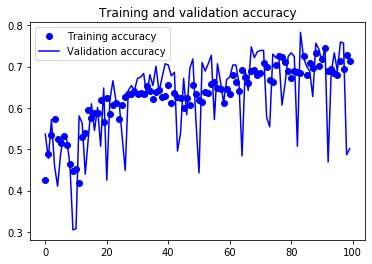

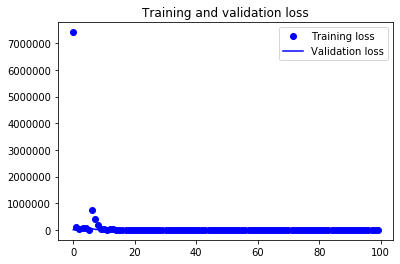

In [82]:
accuracy_rfe = model_rfe_train.history['accuracy']
val_accuracy_rfe = model_rfe_train.history['val_accuracy']
loss_rfe = model_rfe_train.history['loss']
val_loss_rfe = model_rfe_train.history['val_loss']
epochs_rfe = range(len(accuracy_rfe))
plt.plot(epochs_rfe, accuracy_rfe, 'bo', label='Training accuracy')
plt.plot(epochs_rfe, val_accuracy_rfe, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs_rfe, loss_rfe, 'bo', label='Training loss')
plt.plot(epochs_rfe, val_loss_rfe, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [83]:
predicted_classes_rfe = model_rfe.predict(x_rfe_test)

In [84]:
predicted_classes_rfe = np.argmax(np.round(predicted_classes_rfe),axis=1)

In [85]:
predicted_classes_rfe.shape, y_rfe_test.shape

((427,), (427,))

214


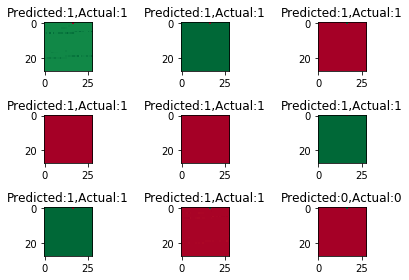

In [86]:
correct_rfe = np.where(predicted_classes_rfe==y_rfe_test)[0]
print(len(correct_rfe))
for i, correct_rfe in enumerate(correct_rfe[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_rfe_test[correct_rfe].reshape(28,28), cmap='RdYlGn', interpolation='none')
    plt.title("Predicted:{},Actual:{}".format(predicted_classes_rfe[correct_rfe], y_rfe_test[correct_rfe]))
    plt.tight_layout()

213


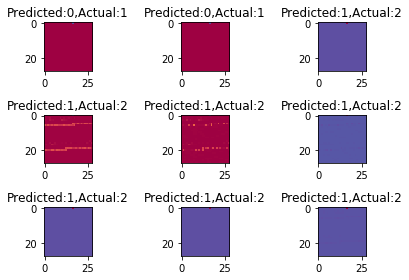

In [87]:
incorrect_rfe = np.where(predicted_classes_rfe!=y_rfe_test)[0]
print(len(incorrect_rfe))
for i, incorrect_rfe in enumerate(incorrect_rfe[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_rfe_test[incorrect_rfe].reshape(28,28), cmap='Spectral', interpolation='none')
    plt.title("Predicted:{},Actual:{}".format(predicted_classes_rfe[incorrect_rfe], y_rfe_test[incorrect_rfe]))
    plt.tight_layout()

In [88]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_rfe_test, predicted_classes_rfe, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.71      0.35      0.47       153
     Class 1       0.39      0.84      0.53       142
     Class 2       0.98      0.31      0.47       132

    accuracy                           0.50       427
   macro avg       0.69      0.50      0.49       427
weighted avg       0.68      0.50      0.49       427



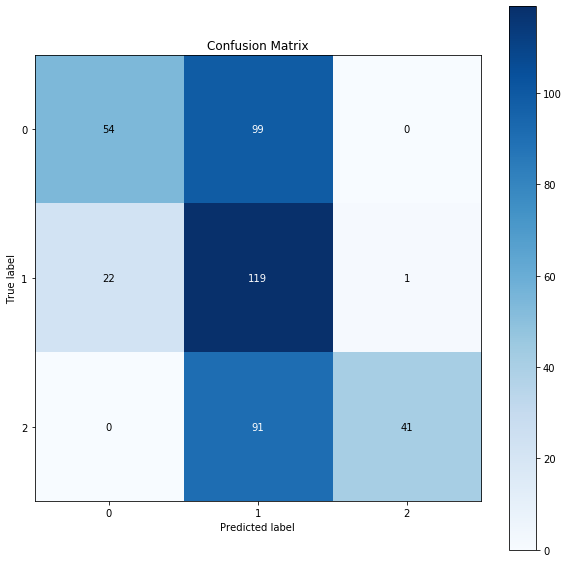

In [89]:
! pip install -q scikit-plot
import scikitplot as skplt
y_pred = np.array(list(map(lambda x: np.argmax(x), model_rfe.predict(x_rfe_test))))
skplt.metrics.plot_confusion_matrix(
    y_rfe_test, 
    y_pred,
    figsize=(10,10))

# Deep Learning_CNN_Feature Selected using LR

In [90]:
eeg_data_lr=eeg_data_encoded[['# mean_0_a',
 'mean_1_a',
 'mean_3_a',
 'mean_4_a',
 'mean_d_0_a2',
 'mean_d_3_a2',
 'mean_d_5_a',
 'mean_d_8_a',
 'mean_d_9_a',
 'mean_d_10_a',
 'mean_d_13_a',
 'mean_d_15_a',
 'mean_d_18_a',
 'stddev_1_a',
 'stddev_2_a',
 'stddev_3_a',
 'max_1_a',
 'max_2_a',
 'max_3_a',
 'max_4_a',
 'max_q_1_a',
 'max_q_2_a',
 'max_q_3_a',
 'max_q_4_a',
 'max_q_6_a',
 'max_q_7_a',
 'max_q_8_a',
 'max_q_11_a',
 'max_q_12_a',
 'max_q_13_a',
 'max_q_16_a',
 'max_q_17_a',
 'max_q_18_a',
 'max_q_22_a',
 'max_q_24_a',
 'max_q_47_a',
 'min_1_a',
 'min_2_a',
 'min_3_a',
 'min_d_3_a',
 'min_q_0_a',
 'min_q_1_a',
 'min_q_2_a',
 'min_q_3_a',
 'min_q_5_a',
 'min_q_6_a',
 'min_q_7_a',
 'min_q_8_a',
 'min_q_10_a',
 'min_q_11_a',
 'min_q_12_a',
 'min_q_13_a',
 'min_q_15_a',
 'min_q_16_a',
 'min_q_17_a',
 'min_q_18_a',
 'min_q_37_a',
 'covmat_0_a',
 'covmat_1_a',
 'covmat_5_a',
 'covmat_7_a',
 'covmat_8_a',
 'covmat_9_a',
 'covmat_12_a',
 'covmat_13_a',
 'covmat_19_a',
 'covmat_20_a',
 'covmat_31_a',
 'covmat_39_a',
 'covmat_44_a',
 'covmat_46_a',
 'covmat_52_a',
 'covmat_56_a',
 'covmat_57_a',
 'covmat_60_a',
 'covmat_78_a',
 'covmat_79_a',
 'covmat_84_a',
 'covmat_85_a',
 'covmat_86_a',
 'covmat_90_a',
 'covmat_96_a',
 'covmat_97_a',
 'covmat_99_a',
 'covmat_100_a',
 'covmat_104_a',
 'covmat_108_a',
 'covmat_112_a',
 'covmat_117_a',
 'covmat_118_a',
 'covmat_123_a',
 'covmat_129_a',
 'covmat_130_a',
 'eigen_0_a',
 'eigen_1_a',
 'eigen_2_a',
 'eigen_4_a',
 'eigen_5_a',
 'eigen_6_a',
 'logm_0_a',
 'logm_1_a',
 'logm_2_a',
 'logm_3_a',
 'logm_4_a',
 'logm_5_a',
 'logm_6_a',
 'logm_7_a',
 'logm_8_a',
 'logm_9_a',
 'logm_10_a',
 'logm_11_a',
 'logm_12_a',
 'logm_13_a',
 'logm_14_a',
 'logm_15_a',
 'logm_17_a',
 'logm_19_a',
 'logm_22_a',
 'logm_23_a',
 'logm_24_a',
 'logm_25_a',
 'logm_28_a',
 'logm_30_a',
 'logm_31_a',
 'logm_33_a',
 'logm_34_a',
 'logm_35_a',
 'logm_36_a',
 'logm_37_a',
 'logm_40_a',
 'logm_41_a',
 'logm_42_a',
 'logm_43_a',
 'logm_45_a',
 'logm_48_a',
 'logm_49_a',
 'logm_50_a',
 'logm_51_a',
 'logm_52_a',
 'logm_53_a',
 'logm_54_a',
 'logm_55_a',
 'logm_57_a',
 'logm_58_a',
 'logm_59_a',
 'logm_61_a',
 'logm_62_a',
 'logm_63_a',
 'logm_64_a',
 'logm_65_a',
 'logm_66_a',
 'logm_68_a',
 'logm_70_a',
 'logm_72_a',
 'logm_74_a',
 'logm_75_a',
 'logm_77_a',
 'entropy0_a',
 'entropy2_a',
 'entropy3_a',
 'correlate_0_a',
 'correlate_3_a',
 'correlate_9_a',
 'correlate_12_a',
 'correlate_14_a',
 'correlate_17_a',
 'correlate_18_a',
 'correlate_19_a',
 'correlate_20_a',
 'correlate_21_a',
 'correlate_22_a',
 'correlate_23_a',
 'correlate_24_a',
 'correlate_25_a',
 'correlate_26_a',
 'correlate_27_a',
 'correlate_28_a',
 'correlate_29_a',
 'correlate_31_a',
 'correlate_32_a',
 'correlate_33_a',
 'correlate_40_a',
 'correlate_41_a',
 'correlate_44_a',
 'correlate_50_a',
 'correlate_53_a',
 'correlate_57_a',
 'correlate_59_a',
 'correlate_63_a',
 'correlate_65_a',
 'correlate_67_a',
 'correlate_71_a',
 'correlate_73_a',
 'correlate_74_a',
 'fft_0_a',
 'fft_1_a',
 'fft_4_a',
 'fft_5_a',
 'fft_6_a',
 'fft_9_a',
 'fft_10_a',
 'fft_15_a',
 'fft_17_a',
 'fft_18_a',
 'fft_20_a',
 'fft_25_a',
 'fft_30_a',
 'fft_31_a',
 'fft_32_a',
 'fft_33_a',
 'fft_34_a',
 'fft_35_a',
 'fft_40_a',
 'fft_41_a',
 'fft_44_a',
 'fft_45_a',
 'fft_47_a',
 'fft_48_a',
 'fft_50_a',
 'fft_51_a',
 'fft_54_a',
 'fft_57_a',
 'fft_58_a',
 'fft_61_a',
 'fft_64_a',
 'fft_70_a',
 'fft_75_a',
 'fft_77_a',
 'fft_78_a',
 'fft_80_a',
 'fft_90_a',
 'fft_92_a',
 'fft_93_a',
 'fft_95_a',
 'fft_100_a',
 'fft_105_a',
 'fft_107_a',
 'fft_108_a',
 'fft_110_a',
 'fft_111_a',
 'fft_114_a',
 'fft_115_a',
 'fft_120_a',
 'fft_125_a',
 'fft_130_a',
 'fft_137_a',
 'fft_138_a',
 'fft_140_a',
 'fft_165_a',
 'fft_170_a',
 'fft_175_a',
 'fft_180_a',
 'fft_182_a',
 'fft_183_a',
 'fft_185_a',
 'fft_187_a',
 'fft_188_a',
 'fft_197_a',
 'fft_198_a',
 'fft_200_a',
 'fft_205_a',
 'fft_206_a',
 'fft_209_a',
 'fft_215_a',
 'fft_221_a',
 'fft_224_a',
 'fft_225_a',
 'fft_242_a',
 'fft_243_a',
 'fft_250_a',
 'fft_251_a',
 'fft_254_a',
 'fft_255_a',
 'fft_260_a',
 'fft_270_a',
 'fft_275_a',
 'fft_280_a',
 'fft_285_a',
 'fft_286_a',
 'fft_289_a',
 'fft_290_a',
 'fft_302_a',
 'fft_303_a',
 'fft_307_a',
 'fft_308_a',
 'fft_311_a',
 'fft_314_a',
 'fft_315_a',
 'fft_316_a',
 'fft_319_a',
 'fft_320_a',
 'fft_331_a',
 'fft_334_a',
 'fft_336_a',
 'fft_339_a',
 'fft_340_a',
 'fft_345_a',
 'fft_360_a',
 'fft_365_a',
 'fft_375_a',
 'fft_381_a',
 'fft_384_a',
 'fft_390_a',
 'fft_392_a',
 'fft_393_a',
 'fft_395_a',
 'fft_405_a',
 'fft_407_a',
 'fft_408_a',
 'fft_410_a',
 'fft_415_a',
 'fft_422_a',
 'fft_423_a',
 'fft_432_a',
 'fft_433_a',
 'fft_441_a',
 'fft_444_a',
 'fft_445_a',
 'fft_446_a',
 'fft_449_a',
 'fft_452_a',
 'fft_453_a',
 'fft_465_a',
 'fft_467_a',
 'fft_468_a',
 'fft_470_a',
 'fft_475_a',
 'fft_480_a',
 'fft_486_a',
 'fft_489_a',
 'fft_490_a',
 'fft_495_a',
 'fft_496_a',
 'fft_499_a',
 'fft_500_a',
 'fft_505_a',
 'fft_515_a',
 'fft_540_a',
 'fft_557_a',
 'fft_558_a',
 'fft_560_a',
 'fft_572_a',
 'fft_573_a',
 'fft_575_a',
 'fft_580_a',
 'fft_581_a',
 'fft_584_a',
 'fft_625_a',
 'fft_626_a',
 'fft_629_a',
 'fft_635_a',
 'fft_657_a',
 'fft_658_a',
 'fft_660_a',
 'fft_661_a',
 'fft_664_a',
 'fft_665_a',
 'fft_666_a',
 'fft_669_a',
 'fft_675_a',
 'fft_677_a',
 'fft_678_a',
 'fft_682_a',
 'fft_683_a',
 'fft_690_a',
 'fft_691_a',
 'fft_694_a',
 'fft_695_a',
 'fft_706_a',
 'fft_709_a',
 'fft_725_a',
 'fft_735_a',
 'mean_0_b',
 'mean_1_b',
 'mean_3_b',
 'mean_4_b',
 'mean_d_0_b2',
 'mean_d_3_b2',
 'mean_d_5_b',
 'mean_d_8_b',
 'mean_d_10_b',
 'mean_d_13_b',
 'mean_d_15_b',
 'mean_d_18_b',
 'mean_d_25_b',
 'mean_d_47_b',
 'stddev_1_b',
 'stddev_2_b',
 'stddev_3_b',
 'stddev_d_2_b',
 'max_1_b',
 'max_2_b',
 'max_3_b',
 'max_4_b',
 'max_d_2_b',
 'max_q_1_b',
 'max_q_2_b',
 'max_q_3_b',
 'max_q_4_b',
 'max_q_6_b',
 'max_q_7_b',
 'max_q_8_b',
 'max_q_10_b',
 'max_q_11_b',
 'max_q_12_b',
 'max_q_13_b',
 'max_q_16_b',
 'max_q_17_b',
 'max_q_18_b',
 'max_q_19_b',
 'max_q_22_b',
 'max_q_24_b',
 'max_q_47_b',
 'max_q_49_b',
 'min_1_b',
 'min_2_b',
 'min_3_b',
 'min_4_b',
 'min_q_0_b',
 'min_q_1_b',
 'min_q_2_b',
 'min_q_3_b',
 'min_q_5_b',
 'min_q_6_b',
 'min_q_7_b',
 'min_q_8_b',
 'min_q_10_b',
 'min_q_11_b',
 'min_q_12_b',
 'min_q_13_b',
 'min_q_15_b',
 'min_q_16_b',
 'min_q_17_b',
 'min_q_18_b',
 'min_q_35_b',
 'min_q_37_b',
 'min_q_42_b',
 'covmat_0_b',
 'covmat_1_b',
 'covmat_5_b',
 'covmat_7_b',
 'covmat_8_b',
 'covmat_12_b',
 'covmat_13_b',
 'covmat_18_b',
 'covmat_19_b',
 'covmat_20_b',
 'covmat_28_b',
 'covmat_31_b',
 'covmat_39_b',
 'covmat_44_b',
 'covmat_50_b',
 'covmat_52_b',
 'covmat_60_b',
 'covmat_73_b',
 'covmat_78_b',
 'covmat_79_b',
 'covmat_84_b',
 'covmat_85_b',
 'covmat_86_b',
 'covmat_90_b',
 'covmat_96_b',
 'covmat_97_b',
 'covmat_99_b',
 'covmat_104_b',
 'covmat_117_b',
 'covmat_118_b',
 'covmat_129_b',
 'covmat_130_b',
 'eigen_0_b',
 'eigen_1_b',
 'eigen_2_b',
 'eigen_4_b',
 'eigen_5_b',
 'eigen_6_b',
 'eigen_10_b',
 'eigen_11_b',
 'logm_0_b',
 'logm_1_b',
 'logm_2_b',
 'logm_3_b',
 'logm_4_b',
 'logm_5_b',
 'logm_6_b',
 'logm_7_b',
 'logm_8_b',
 'logm_9_b',
 'logm_10_b',
 'logm_11_b',
 'logm_12_b',
 'logm_13_b',
 'logm_14_b',
 'logm_15_b',
 'logm_17_b',
 'logm_19_b',
 'logm_20_b',
 'logm_22_b',
 'logm_23_b',
 'logm_24_b',
 'logm_26_b',
 'logm_27_b',
 'logm_30_b',
 'logm_31_b',
 'logm_33_b',
 'logm_34_b',
 'logm_35_b',
 'logm_36_b',
 'logm_37_b',
 'logm_38_b',
 'logm_42_b',
 'logm_43_b',
 'logm_45_b',
 'logm_48_b',
 'logm_50_b',
 'logm_51_b',
 'logm_52_b',
 'logm_53_b',
 'logm_54_b',
 'logm_55_b',
 'logm_56_b',
 'logm_57_b',
 'logm_58_b',
 'logm_61_b',
 'logm_62_b',
 'logm_63_b',
 'logm_64_b',
 'logm_66_b',
 'logm_68_b',
 'logm_69_b',
 'logm_70_b',
 'logm_72_b',
 'logm_75_b',
 'logm_76_b',
 'logm_77_b',
 'entropy0_b',
 'entropy1_b',
 'entropy2_b',
 'entropy3_b',
 'correlate_0_b',
 'correlate_1_b',
 'correlate_3_b',
 'correlate_11_b',
 'correlate_12_b',
 'correlate_14_b',
 'correlate_16_b',
 'correlate_17_b',
 'correlate_19_b',
 'correlate_20_b',
 'correlate_22_b',
 'correlate_23_b',
 'correlate_24_b',
 'correlate_26_b',
 'correlate_30_b',
 'correlate_31_b',
 'correlate_32_b',
 'correlate_39_b',
 'correlate_40_b',
 'correlate_41_b',
 'correlate_44_b',
 'correlate_45_b',
 'correlate_53_b',
 'correlate_57_b',
 'correlate_67_b',
 'correlate_71_b',
 'correlate_73_b',
 'fft_0_b',
 'fft_6_b',
 'fft_9_b',
 'fft_15_b',
 'fft_17_b',
 'fft_18_b',
 'fft_20_b',
 'fft_30_b',
 'fft_32_b',
 'fft_33_b',
 'fft_35_b',
 'fft_40_b',
 'fft_47_b',
 'fft_48_b',
 'fft_57_b',
 'fft_58_b',
 'fft_61_b',
 'fft_64_b',
 'fft_66_b',
 'fft_69_b',
 'fft_70_b',
 'fft_71_b',
 'fft_74_b',
 'fft_75_b',
 'fft_77_b',
 'fft_78_b',
 'fft_90_b',
 'fft_92_b',
 'fft_93_b',
 'fft_95_b',
 'fft_100_b',
 'fft_110_b',
 'fft_111_b',
 'fft_114_b',
 'fft_115_b',
 'fft_120_b',
 'fft_125_b',
 'fft_130_b',
 'fft_140_b',
 'fft_165_b',
 'fft_182_b',
 'fft_183_b',
 'fft_185_b',
 'fft_197_b',
 'fft_198_b',
 'fft_200_b',
 'fft_205_b',
 'fft_206_b',
 'fft_209_b',
 'fft_250_b',
 'fft_251_b',
 'fft_254_b',
 'fft_260_b',
 'fft_282_b',
 'fft_283_b',
 'fft_285_b',
 'fft_286_b',
 'fft_289_b',
 'fft_290_b',
 'fft_291_b',
 'fft_294_b',
 'fft_300_b',
 'fft_302_b',
 'fft_303_b',
 'fft_307_b',
 'fft_308_b',
 'fft_315_b',
 'fft_316_b',
 'fft_319_b',
 'fft_320_b',
 'fft_331_b',
 'fft_334_b',
 'fft_360_b',
 'fft_375_b',
 'fft_381_b',
 'fft_384_b',
 'fft_390_b',
 'fft_392_b',
 'fft_393_b',
 'fft_395_b',
 'fft_400_b',
 'fft_405_b',
 'fft_406_b',
 'fft_407_b',
 'fft_408_b',
 'fft_409_b',
 'fft_422_b',
 'fft_423_b',
 'fft_432_b',
 'fft_433_b',
 'fft_441_b',
 'fft_442_b',
 'fft_443_b',
 'fft_444_b',
 'fft_445_b',
 'fft_446_b',
 'fft_449_b',
 'fft_450_b',
 'fft_452_b',
 'fft_453_b',
 'fft_455_b',
 'fft_456_b',
 'fft_459_b',
 'fft_461_b',
 'fft_464_b',
 'fft_465_b',
 'fft_467_b',
 'fft_468_b',
 'fft_470_b',
 'fft_475_b',
 'fft_477_b',
 'fft_478_b',
 'fft_482_b',
 'fft_483_b',
 'fft_486_b',
 'fft_489_b',
 'fft_490_b',
 'fft_495_b',
 'fft_497_b',
 'fft_498_b',
 'fft_500_b',
 'fft_505_b',
 'fft_512_b',
 'fft_513_b',
 'fft_515_b',
 'fft_530_b',
 'fft_536_b',
 'fft_539_b',
 'fft_546_b',
 'fft_549_b',
 'fft_555_b',
 'fft_557_b',
 'fft_558_b',
 'fft_566_b',
 'fft_567_b',
 'fft_568_b',
 'fft_569_b',
 'fft_570_b',
 'fft_571_b',
 'fft_572_b',
 'fft_573_b',
 'fft_574_b',
 'fft_575_b',
 'fft_580_b',
 'fft_581_b',
 'fft_584_b',
 'fft_591_b',
 'fft_594_b',
 'fft_596_b',
 'fft_599_b',
 'fft_615_b',
 'fft_616_b',
 'fft_619_b',
 'fft_620_b',
 'fft_626_b',
 'fft_629_b',
 'fft_630_b',
 'fft_635_b',
 'fft_640_b',
 'fft_645_b',
 'fft_650_b',
 'fft_651_b',
 'fft_654_b',
 'fft_655_b',
 'fft_656_b',
 'fft_657_b',
 'fft_658_b',
 'fft_659_b',
 'fft_660_b',
 'fft_661_b',
 'fft_662_b',
 'fft_663_b',
 'fft_664_b',
 'fft_665_b',
 'fft_666_b',
 'fft_669_b',
 'fft_670_b',
 'fft_675_b',
 'fft_676_b',
 'fft_677_b',
 'fft_678_b',
 'fft_679_b',
 'fft_680_b',
 'fft_682_b',
 'fft_683_b',
 'fft_686_b',
 'fft_687_b',
 'fft_688_b',
 'fft_689_b',
 'fft_690_b',
 'fft_692_b',
 'fft_693_b',
 'fft_695_b',
 'fft_696_b',
 'fft_699_b',
 'fft_705_b',
 'fft_707_b',
 'fft_708_b',
 'fft_710_b',
 'fft_711_b',
 'fft_714_b',
 'fft_715_b',
 'fft_720_b',
 'fft_722_b',
 'fft_723_b',
 'fft_725_b',
 'fft_730_b',
 'fft_731_b',
 'fft_734_b',
 'fft_735_b',
 'fft_736_b',
 'fft_737_b',
 'fft_738_b',
 'fft_739_b',
 'fft_740_b',
 'fft_741_b',
 'fft_744_b',
 'fft_746_b',
 'fft_749_b','label']]

In [91]:
eeg_data_lr.head()

,# mean_0_a,mean_1_a,mean_3_a,mean_4_a,mean_d_0_a2,mean_d_3_a2,mean_d_5_a,mean_d_8_a,mean_d_9_a,mean_d_10_a,...,fft_736_b,fft_737_b,fft_738_b,fft_739_b,fft_740_b,fft_741_b,fft_744_b,fft_746_b,fft_749_b,label
0,4.62,30.3,15.6,26.3,2.15,14.40,5.98,14.7,27.9,3.17,...,374.0,-185.00,-185.00,374.0,74.3,23.5,23.5,280.00,280.00,2
1,28.80,33.1,25.8,22.8,25.60,21.50,25.50,26.2,32.9,31.80,...,-19.0,40.70,40.70,-19.0,130.0,-23.3,-23.3,2.57,2.57,0
2,8.90,29.4,16.7,23.7,7.75,9.89,-68.90,-65.4,20.0,79.80,...,159.0,-48.80,-48.80,159.0,-534.0,462.0,462.0,281.00,281.00,1
3,14.90,31.6,19.8,24.3,17.30,20.40,13.20,16.9,27.7,15.70,...,-61.9,-5.08,-5.08,-61.9,-183.0,299.0,299.0,-12.40,-12.40,1
4,28.30,31.3,27.3,24.5,26.10,23.70,-3.87,-10.0,22.9,59.40,...,15.9,-7.25,-7.25,15.9,114.0,12.0,12.0,-17.60,-17.60,0


In [92]:
eeg_data_lr.iloc[3,1:].values.reshape(28,28).astype('uint8')

array([[ 31,  19,  24,  17,  20,  13,  16,  27,  15,  20,  13,  21,   2,
          1,   9,  42, 189,  42, 100,  36, 149,  37,  95,  37, 160,  42,
         42, 189],
       [ 35,  36, 152,  41, 246, 252,  37,  25, 205, 250,  10, 233,  26,
         97, 252, 235,  26, 211, 250, 243,  25, 205,   4, 235,  25,  56,
          4,   5],
       [ 78, 176, 171,  95, 104,  68, 176,  66,  74,  72,  18,   2, 146,
        140, 140, 152, 232, 171, 144, 222,  95,  74,  18, 222, 104,  72,
        146, 152],
       [192,  68, 232, 144, 158, 140, 158, 108,  96, 232, 146, 210, 172,
         60,   7,   5, 233,   5,   7,   6,   0,   3,  11,  10,   5,   6,
          0,   3],
       [253,   0,   0,   0,   1,   1,   2, 254,   0,   0,   0,   0,   0,
          0, 254,   0,   0,   0,   0,   0,   0, 255,   0,   0,   2, 253,
          0,   0],
       [  2,   1,   0,   0,   0,   0,   0,   0,   0, 255,   0, 255,   0,
          2,   1,   0,   0,   0,   0,  58, 226, 138, 148,  80, 160, 116,
         56,  82],
       [16

In [93]:
x_lr = eeg_data_lr.iloc[:,1:].values.reshape(len(eeg_data_lr),28,28,1)
y_lr = eeg_data_lr.iloc[:,-1].values

In [94]:
x_lr_train, x_lr_test, y_lr_train, y_lr_test = train_test_split(x_lr,y_lr,test_size=0.2,random_state=4)

In [95]:
print('Training data shape : ', x_lr_train.shape, y_lr_train.shape)

print('Testing data shape : ', x_lr_test.shape, y_lr_test.shape)

Training data shape :  (1705, 28, 28, 1) (1705,)
Testing data shape :  (427, 28, 28, 1) (427,)


In [96]:
classes = np.unique(y_lr_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  3
Output classes :  [0 1 2]


In [97]:
x_lr_train = x_lr_train.reshape(-1, 28,28, 1)
x_lr_test = x_lr_test.reshape(-1, 28,28, 1)
x_lr_train.shape, x_lr_test.shape

((1705, 28, 28, 1), (427, 28, 28, 1))

In [98]:
x_lr_train = x_lr_train.astype('float32')
x_lr_test = x_lr_test.astype('float32')
x_lr_train = x_lr_train / 255.
x_lr_test = x_lr_test / 255.

In [99]:
train_lr_Y_one_hot = to_categorical(y_lr_train)
test_lr_Y_one_hot = to_categorical(y_lr_test)

# Display the change for category label using one-hot encoding
print('Original label:', y_lr_train[0])
print('After conversion to one-hot:', train_lr_Y_one_hot[0])

Original label: 0
After conversion to one-hot: [1. 0. 0.]


In [100]:
from sklearn.model_selection import train_test_split
train_lr_X,valid_lr_X,train_lr_label,valid_lr_label = train_test_split(x_lr_train, train_lr_Y_one_hot, test_size=0.2, random_state=13)

In [101]:
train_lr_X.shape,valid_lr_X.shape,train_lr_label.shape,valid_lr_label.shape

((1364, 28, 28, 1), (341, 28, 28, 1), (1364, 3), (341, 3))

In [102]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [103]:
batch_size = 64
epochs = 100
num_classes = 3

In [104]:
model_lr = Sequential()
model_lr.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
model_lr.add(LeakyReLU(alpha=0.1))
model_lr.add(MaxPooling2D((2, 2),padding='same'))
model_lr.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model_lr.add(LeakyReLU(alpha=0.1))
model_lr.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model_lr.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model_lr.add(LeakyReLU(alpha=0.1))                  
model_lr.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model_lr.add(Flatten())
model_lr.add(Dense(128, activation='linear'))
model_lr.add(LeakyReLU(alpha=0.1))                  
model_lr.add(Dense(num_classes, activation='softmax'))

In [105]:
model_lr.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [106]:
model_lr.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 7, 7, 128)        

In [107]:
lr_train = model_lr.fit(train_lr_X, train_lr_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_lr_X, valid_lr_label))

Train on 1364 samples, validate on 341 samples
Epoch 1/100
1364/1364 [==============================] - 4s 3ms/step - loss: 29.1601 - accuracy: 0.3541 - val_loss: 1.4483 - val_accuracy: 0.4340
Epoch 2/100
1364/1364 [==============================] - 3s 2ms/step - loss: 1.3007 - accuracy: 0.5044 - val_loss: 1.2200 - val_accuracy: 0.4897
Epoch 3/100
1364/1364 [==============================] - 3s 2ms/step - loss: 1.1674 - accuracy: 0.5132 - val_loss: 1.0082 - val_accuracy: 0.5455
Epoch 4/100
1364/1364 [==============================] - 3s 2ms/step - loss: 0.8654 - accuracy: 0.5982 - val_loss: 0.9378 - val_accuracy: 0.6950
Epoch 5/100
1364/1364 [==============================] - 3s 2ms/step - loss: 0.8000 - accuracy: 0.7207 - val_loss: 0.7473 - val_accuracy: 0.7126
Epoch 6/100
1364/1364 [==============================] - 3s 2ms/step - loss: 0.7036 - accuracy: 0.7397 - val_loss: 0.8576 - val_accuracy: 0.6569
Epoch 7/100
1364/1364 [==============================] - 3s 2ms/step - loss: 0.735

In [108]:
test_lr_eval = model_lr.evaluate(x_lr_test, test_lr_Y_one_hot, verbose=0)

In [109]:
print('Test loss:', test_lr_eval[0])
print('Test accuracy:', test_lr_eval[1])

Test loss: 0.4905238145159719
Test accuracy: 0.9156908392906189


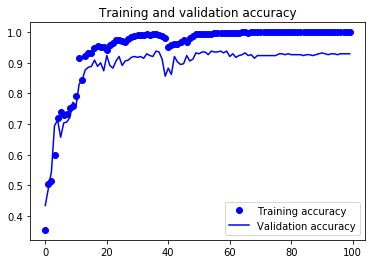

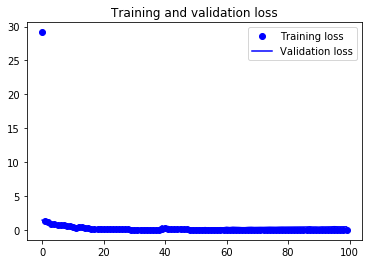

In [110]:
accuracy_lr = lr_train.history['accuracy']
val_accuracy_lr = lr_train.history['val_accuracy']
loss_lr = lr_train.history['loss']
val_loss_lr = lr_train.history['val_loss']
epochs_lr = range(len(accuracy_lr))
plt.plot(epochs_lr, accuracy_lr, 'bo', label='Training accuracy')
plt.plot(epochs_lr, val_accuracy_lr, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs_lr, loss_lr, 'bo', label='Training loss')
plt.plot(epochs_lr, val_loss_lr, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [111]:
predicted_classes_lr = model_lr.predict(x_lr_test)

In [112]:
predicted_classes_lr = np.argmax(np.round(predicted_classes_lr),axis=1)

In [113]:
predicted_classes_lr.shape, y_lr_test.shape

((427,), (427,))

391


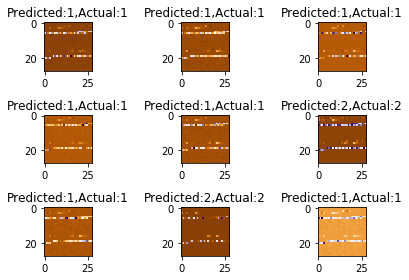

In [114]:
correct_lr = np.where(predicted_classes_lr==y_lr_test)[0]
print(len(correct_lr))
for i, correct_lr in enumerate(correct_lr[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_lr_test[correct_lr].reshape(28,28), cmap='PuOr', interpolation='none')
    plt.title("Predicted:{},Actual:{}".format(predicted_classes_lr[correct_lr], y_lr_test[correct_lr]))
    plt.tight_layout()

36


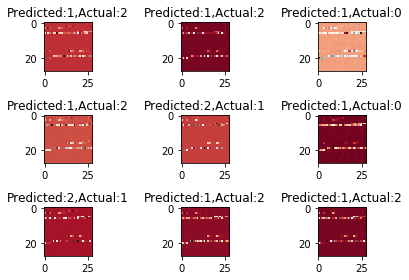

In [115]:
incorrect_lr = np.where(predicted_classes_lr!=y_lr_test)[0]
print(len(incorrect_lr))
for i, incorrect_lr in enumerate(incorrect_lr[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_lr_test[incorrect_lr].reshape(28,28), cmap='RdGy', interpolation='none')
    plt.title("Predicted:{},Actual:{}".format(predicted_classes_lr[incorrect_lr], y_lr_test[incorrect_lr]))
    plt.tight_layout()

In [116]:
# from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_lr_test, predicted_classes_lr, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.97      0.96      0.97       153
     Class 1       0.87      0.87      0.87       142
     Class 2       0.90      0.91      0.90       132

    accuracy                           0.92       427
   macro avg       0.91      0.91      0.91       427
weighted avg       0.92      0.92      0.92       427



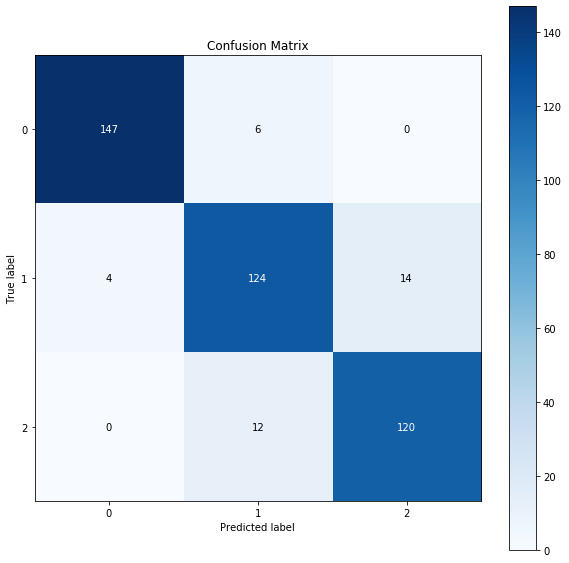

In [117]:
! pip install -q scikit-plot
import scikitplot as skplt
y_pred = np.array(list(map(lambda x: np.argmax(x), model_lr.predict(x_lr_test))))
skplt.metrics.plot_confusion_matrix(
    y_lr_test, 
    y_pred,
    figsize=(10,10))

# Deep Learning_CNN_Feature Selected using RF

In [118]:
eeg_data_rf=eeg_data_encoded[['# mean_0_a',
 'mean_1_a',
 'mean_2_a',
 'mean_3_a',
 'mean_4_a',
 'mean_d_1_a',
 'mean_d_2_a',
 'mean_d_3_a',
 'mean_d_0_a2',
 'mean_d_1_a2',
 'mean_d_2_a2',
 'mean_d_3_a2',
 'mean_d_4_a2',
 'mean_d_5_a',
 'mean_d_6_a',
 'mean_d_7_a',
 'mean_d_8_a',
 'mean_d_9_a',
 'mean_d_10_a',
 'mean_d_11_a',
 'mean_d_12_a',
 'mean_d_13_a',
 'mean_d_15_a',
 'mean_d_16_a',
 'mean_d_17_a',
 'mean_d_18_a',
 'mean_d_19_a',
 'mean_d_20_a',
 'mean_d_28_a',
 'mean_d_30_a',
 'mean_d_33_a',
 'mean_d_40_a',
 'mean_d_42_a',
 'mean_d_43_a',
 'mean_d_45_a',
 'stddev_0_a',
 'stddev_1_a',
 'stddev_2_a',
 'stddev_3_a',
 'stddev_d_0_a',
 'stddev_d_3_a',
 'moments_1_a',
 'moments_3_a',
 'moments_5_a',
 'moments_6_a',
 'moments_7_a',
 'moments_8_a',
 'moments_10_a',
 'moments_11_a',
 'moments_13_a',
 'moments_15_a',
 'moments_16_a',
 'moments_17_a',
 'moments_18_a',
 'max_1_a',
 'max_2_a',
 'max_d_3_a',
 'max_q_0_a',
 'max_q_1_a',
 'max_q_3_a',
 'max_q_6_a',
 'max_q_7_a',
 'max_q_8_a',
 'max_q_11_a',
 'max_q_12_a',
 'max_q_13_a',
 'max_q_15_a',
 'max_q_16_a',
 'max_q_18_a',
 'max_q_23_a',
 'max_q_32_a',
 'max_q_33_a',
 'max_q_37_a',
 'max_q_38_a',
 'min_0_a',
 'min_1_a',
 'min_2_a',
 'min_3_a',
 'min_d_0_a',
 'min_d_2_a',
 'min_d_3_a',
 'min_q_0_a',
 'min_q_1_a',
 'min_q_2_a',
 'min_q_3_a',
 'min_q_5_a',
 'min_q_6_a',
 'min_q_7_a',
 'min_q_8_a',
 'min_q_10_a',
 'min_q_11_a',
 'min_q_12_a',
 'min_q_13_a',
 'min_q_15_a',
 'min_q_16_a',
 'min_q_17_a',
 'min_q_18_a',
 'min_q_20_a',
 'min_q_22_a',
 'min_q_23_a',
 'min_q_27_a',
 'min_q_30_a',
 'min_q_33_a',
 'min_q_38_a',
 'min_q_43_a',
 'min_q_45_a',
 'covmat_0_a',
 'covmat_1_a',
 'covmat_4_a',
 'covmat_5_a',
 'covmat_6_a',
 'covmat_8_a',
 'covmat_9_a',
 'covmat_12_a',
 'covmat_13_a',
 'covmat_14_a',
 'covmat_15_a',
 'covmat_19_a',
 'covmat_20_a',
 'covmat_22_a',
 'covmat_24_a',
 'covmat_28_a',
 'covmat_29_a',
 'covmat_31_a',
 'covmat_34_a',
 'covmat_36_a',
 'covmat_37_a',
 'covmat_39_a',
 'covmat_41_a',
 'covmat_42_a',
 'covmat_43_a',
 'covmat_44_a',
 'covmat_45_a',
 'covmat_48_a',
 'covmat_49_a',
 'covmat_50_a',
 'covmat_52_a',
 'covmat_56_a',
 'covmat_59_a',
 'covmat_62_a',
 'covmat_65_a',
 'covmat_69_a',
 'covmat_74_a',
 'covmat_75_a',
 'covmat_78_a',
 'covmat_80_a',
 'covmat_81_a',
 'covmat_82_a',
 'covmat_83_a',
 'covmat_85_a',
 'covmat_86_a',
 'covmat_87_a',
 'covmat_91_a',
 'covmat_94_a',
 'covmat_96_a',
 'covmat_97_a',
 'covmat_98_a',
 'covmat_99_a',
 'covmat_100_a',
 'covmat_101_a',
 'covmat_104_a',
 'covmat_105_a',
 'covmat_108_a',
 'covmat_109_a',
 'covmat_111_a',
 'covmat_113_a',
 'covmat_114_a',
 'covmat_116_a',
 'covmat_117_a',
 'covmat_121_a',
 'covmat_122_a',
 'covmat_123_a',
 'covmat_128_a',
 'covmat_129_a',
 'covmat_131_a',
 'covmat_132_a',
 'covmat_133_a',
 'covmat_136_a',
 'covmat_139_a',
 'covmat_140_a',
 'covmat_141_a',
 'eigen_0_a',
 'eigen_1_a',
 'eigen_2_a',
 'eigen_3_a',
 'eigen_4_a',
 'eigen_5_a',
 'eigen_6_a',
 'logm_0_a',
 'logm_2_a',
 'logm_3_a',
 'logm_8_a',
 'logm_9_a',
 'logm_10_a',
 'logm_12_a',
 'logm_14_a',
 'logm_24_a',
 'logm_33_a',
 'logm_35_a',
 'logm_54_a',
 'logm_56_a',
 'logm_60_a',
 'logm_75_a',
 'entropy1_a',
 'entropy3_a',
 'correlate_3_a',
 'correlate_5_a',
 'correlate_7_a',
 'correlate_12_a',
 'correlate_14_a',
 'correlate_15_a',
 'correlate_16_a',
 'correlate_17_a',
 'correlate_18_a',
 'correlate_24_a',
 'correlate_28_a',
 'correlate_32_a',
 'correlate_33_a',
 'correlate_34_a',
 'correlate_37_a',
 'correlate_38_a',
 'correlate_39_a',
 'correlate_44_a',
 'correlate_46_a',
 'correlate_48_a',
 'correlate_49_a',
 'correlate_51_a',
 'correlate_54_a',
 'correlate_57_a',
 'correlate_61_a',
 'correlate_62_a',
 'correlate_66_a',
 'correlate_67_a',
 'correlate_71_a',
 'correlate_72_a',
 'correlate_73_a',
 'fft_15_a',
 'fft_16_a',
 'fft_20_a',
 'fft_22_a',
 'fft_34_a',
 'fft_37_a',
 'fft_44_a',
 'fft_47_a',
 'fft_51_a',
 'fft_53_a',
 'fft_60_a',
 'fft_70_a',
 'fft_72_a',
 'fft_74_a',
 'fft_76_a',
 'fft_77_a',
 'fft_83_a',
 'fft_84_a',
 'fft_91_a',
 'fft_92_a',
 'fft_94_a',
 'fft_95_a',
 'fft_100_a',
 'fft_101_a',
 'fft_102_a',
 'fft_104_a',
 'fft_105_a',
 'fft_108_a',
 'fft_114_a',
 'fft_117_a',
 'fft_119_a',
 'fft_120_a',
 'fft_122_a',
 'fft_124_a',
 'fft_129_a',
 'fft_134_a',
 'fft_135_a',
 'fft_138_a',
 'fft_141_a',
 'fft_150_a',
 'fft_153_a',
 'fft_155_a',
 'fft_163_a',
 'fft_166_a',
 'fft_168_a',
 'fft_169_a',
 'fft_170_a',
 'fft_175_a',
 'fft_176_a',
 'fft_179_a',
 'fft_180_a',
 'fft_181_a',
 'fft_184_a',
 'fft_185_a',
 'fft_189_a',
 'fft_194_a',
 'fft_200_a',
 'fft_208_a',
 'fft_210_a',
 'fft_240_a',
 'fft_241_a',
 'fft_245_a',
 'fft_246_a',
 'fft_247_a',
 'fft_253_a',
 'fft_258_a',
 'fft_270_a',
 'fft_272_a',
 'fft_275_a',
 'fft_288_a',
 'fft_290_a',
 'fft_294_a',
 'fft_295_a',
 'fft_301_a',
 'fft_302_a',
 'fft_310_a',
 'fft_324_a',
 'fft_326_a',
 'fft_335_a',
 'fft_336_a',
 'fft_338_a',
 'fft_339_a',
 'fft_340_a',
 'fft_350_a',
 'fft_356_a',
 'fft_371_a',
 'fft_375_a',
 'fft_378_a',
 'fft_401_a',
 'fft_404_a',
 'fft_405_a',
 'fft_409_a',
 'fft_410_a',
 'fft_413_a',
 'fft_416_a',
 'fft_422_a',
 'fft_426_a',
 'fft_429_a',
 'fft_430_a',
 'fft_433_a',
 'fft_441_a',
 'fft_443_a',
 'fft_444_a',
 'fft_445_a',
 'fft_461_a',
 'fft_465_a',
 'fft_471_a',
 'fft_485_a',
 'fft_490_a',
 'fft_492_a',
 'fft_498_a',
 'fft_500_a',
 'fft_504_a',
 'fft_509_a',
 'fft_510_a',
 'fft_512_a',
 'fft_515_a',
 'fft_516_a',
 'fft_519_a',
 'fft_529_a',
 'fft_539_a',
 'fft_541_a',
 'fft_551_a',
 'fft_554_a',
 'fft_556_a',
 'fft_561_a',
 'fft_562_a',
 'fft_564_a',
 'fft_571_a',
 'fft_574_a',
 'fft_575_a',
 'fft_579_a',
 'fft_580_a',
 'fft_583_a',
 'fft_585_a',
 'fft_586_a',
 'fft_596_a',
 'fft_599_a',
 'fft_615_a',
 'fft_621_a',
 'fft_626_a',
 'fft_627_a',
 'fft_635_a',
 'fft_640_a',
 'fft_642_a',
 'fft_648_a',
 'fft_651_a',
 'fft_652_a',
 'fft_654_a',
 'fft_661_a',
 'fft_663_a',
 'fft_664_a',
 'fft_674_a',
 'fft_677_a',
 'fft_680_a',
 'fft_683_a',
 'fft_690_a',
 'fft_694_a',
 'fft_698_a',
 'fft_700_a',
 'fft_701_a',
 'fft_704_a',
 'fft_708_a',
 'fft_719_a',
 'fft_721_a',
 'fft_722_a',
 'fft_734_a',
 'fft_749_a',
 'mean_0_b',
 'mean_1_b',
 'mean_2_b',
 'mean_3_b',
 'mean_4_b',
 'mean_d_0_b',
 'mean_d_3_b',
 'mean_d_0_b2',
 'mean_d_1_b2',
 'mean_d_2_b2',
 'mean_d_3_b2',
 'mean_d_4_b2',
 'mean_d_5_b',
 'mean_d_6_b',
 'mean_d_7_b',
 'mean_d_8_b',
 'mean_d_9_b',
 'mean_d_10_b',
 'mean_d_12_b',
 'mean_d_13_b',
 'mean_d_14_b',
 'mean_d_15_b',
 'mean_d_16_b',
 'mean_d_17_b',
 'mean_d_18_b',
 'mean_d_27_b',
 'mean_d_30_b',
 'mean_d_33_b',
 'mean_d_40_b',
 'mean_d_48_b',
 'stddev_0_b',
 'stddev_1_b',
 'stddev_2_b',
 'stddev_3_b',
 'stddev_d_2_b',
 'stddev_d_3_b',
 'moments_0_b',
 'moments_5_b',
 'moments_6_b',
 'moments_7_b',
 'moments_8_b',
 'moments_10_b',
 'moments_15_b',
 'moments_16_b',
 'moments_17_b',
 'moments_18_b',
 'max_1_b',
 'max_2_b',
 'max_3_b',
 'max_d_4_b',
 'max_q_0_b',
 'max_q_1_b',
 'max_q_3_b',
 'max_q_4_b',
 'max_q_6_b',
 'max_q_8_b',
 'max_q_11_b',
 'max_q_12_b',
 'max_q_13_b',
 'max_q_16_b',
 'max_q_18_b',
 'max_q_19_b',
 'max_q_20_b',
 'max_q_21_b',
 'max_q_23_b',
 'max_q_24_b',
 'max_q_32_b',
 'max_q_33_b',
 'max_q_37_b',
 'max_q_40_b',
 'max_q_42_b',
 'min_0_b',
 'min_1_b',
 'min_2_b',
 'min_3_b',
 'min_4_b',
 'min_d_2_b',
 'min_d_3_b',
 'min_q_0_b',
 'min_q_1_b',
 'min_q_2_b',
 'min_q_3_b',
 'min_q_4_b',
 'min_q_5_b',
 'min_q_6_b',
 'min_q_7_b',
 'min_q_8_b',
 'min_q_10_b',
 'min_q_11_b',
 'min_q_12_b',
 'min_q_13_b',
 'min_q_15_b',
 'min_q_16_b',
 'min_q_17_b',
 'min_q_18_b',
 'min_q_23_b',
 'min_q_26_b',
 'min_q_28_b',
 'min_q_30_b',
 'min_q_32_b',
 'min_q_35_b',
 'min_q_38_b',
 'min_q_40_b',
 'min_q_43_b',
 'min_q_45_b',
 'min_q_49_b',
 'covmat_0_b',
 'covmat_1_b',
 'covmat_3_b',
 'covmat_4_b',
 'covmat_5_b',
 'covmat_8_b',
 'covmat_9_b',
 'covmat_12_b',
 'covmat_13_b',
 'covmat_15_b',
 'covmat_19_b',
 'covmat_20_b',
 'covmat_26_b',
 'covmat_29_b',
 'covmat_30_b',
 'covmat_33_b',
 'covmat_36_b',
 'covmat_37_b',
 'covmat_38_b',
 'covmat_42_b',
 'covmat_46_b',
 'covmat_48_b',
 'covmat_52_b',
 'covmat_60_b',
 'covmat_62_b',
 'covmat_64_b',
 'covmat_69_b',
 'covmat_72_b',
 'covmat_73_b',
 'covmat_74_b',
 'covmat_78_b',
 'covmat_79_b',
 'covmat_82_b',
 'covmat_83_b',
 'covmat_85_b',
 'covmat_86_b',
 'covmat_91_b',
 'covmat_96_b',
 'covmat_97_b',
 'covmat_99_b',
 'covmat_104_b',
 'covmat_106_b',
 'covmat_108_b',
 'covmat_110_b',
 'covmat_111_b',
 'covmat_113_b',
 'covmat_117_b',
 'covmat_119_b',
 'covmat_124_b',
 'covmat_127_b',
 'covmat_130_b',
 'covmat_132_b',
 'covmat_133_b',
 'covmat_138_b',
 'covmat_139_b',
 'eigen_0_b',
 'eigen_1_b',
 'eigen_2_b',
 'eigen_3_b',
 'eigen_5_b',
 'eigen_6_b',
 'eigen_7_b',
 'logm_0_b',
 'logm_1_b',
 'logm_6_b',
 'logm_9_b',
 'logm_11_b',
 'logm_12_b',
 'logm_15_b',
 'logm_50_b',
 'logm_58_b',
 'logm_62_b',
 'logm_64_b',
 'logm_72_b',
 'logm_74_b',
 'entropy1_b',
 'entropy3_b',
 'correlate_0_b',
 'correlate_2_b',
 'correlate_3_b',
 'correlate_4_b',
 'correlate_6_b',
 'correlate_12_b',
 'correlate_13_b',
 'correlate_19_b',
 'correlate_20_b',
 'correlate_24_b',
 'correlate_27_b',
 'correlate_28_b',
 'correlate_30_b',
 'correlate_31_b',
 'correlate_33_b',
 'correlate_36_b',
 'correlate_37_b',
 'correlate_39_b',
 'correlate_40_b',
 'correlate_42_b',
 'correlate_44_b',
 'correlate_45_b',
 'correlate_46_b',
 'correlate_50_b',
 'correlate_53_b',
 'correlate_55_b',
 'correlate_56_b',
 'correlate_57_b',
 'correlate_61_b',
 'correlate_62_b',
 'correlate_63_b',
 'correlate_64_b',
 'correlate_66_b',
 'correlate_67_b',
 'correlate_69_b',
 'correlate_70_b',
 'correlate_72_b',
 'correlate_73_b',
 'correlate_74_b',
 'fft_1_b',
 'fft_5_b',
 'fft_7_b',
 'fft_10_b',
 'fft_15_b',
 'fft_19_b',
 'fft_22_b',
 'fft_25_b',
 'fft_26_b',
 'fft_32_b',
 'fft_37_b',
 'fft_39_b',
 'fft_76_b',
 'fft_78_b',
 'fft_79_b',
 'fft_93_b',
 'fft_120_b',
 'fft_121_b',
 'fft_136_b',
 'fft_149_b',
 'fft_165_b',
 'fft_166_b',
 'fft_169_b',
 'fft_174_b',
 'fft_181_b',
 'fft_182_b',
 'fft_185_b',
 'fft_186_b',
 'fft_190_b',
 'fft_191_b',
 'fft_195_b',
 'fft_198_b',
 'fft_205_b',
 'fft_214_b',
 'fft_224_b',
 'fft_225_b',
 'fft_230_b',
 'fft_232_b',
 'fft_240_b',
 'fft_241_b',
 'fft_243_b',
 'fft_244_b',
 'fft_245_b',
 'fft_252_b',
 'fft_256_b',
 'fft_257_b',
 'fft_258_b',
 'fft_259_b',
 'fft_263_b',
 'fft_265_b',
 'fft_271_b',
 'fft_274_b',
 'fft_275_b',
 'fft_280_b',
 'fft_292_b',
 'fft_296_b',
 'fft_299_b',
 'fft_300_b',
 'fft_301_b',
 'fft_315_b',
 'fft_316_b',
 'fft_319_b',
 'fft_330_b',
 'fft_331_b',
 'fft_334_b',
 'fft_344_b',
 'fft_346_b',
 'fft_356_b',
 'fft_361_b',
 'fft_362_b',
 'fft_371_b',
 'fft_374_b',
 'fft_385_b',
 'fft_386_b',
 'fft_389_b',
 'fft_391_b',
 'fft_396_b',
 'fft_402_b',
 'fft_404_b',
 'fft_406_b',
 'fft_412_b',
 'fft_416_b',
 'fft_425_b',
 'fft_428_b',
 'fft_433_b',
 'fft_438_b',
 'fft_440_b',
 'fft_446_b',
 'fft_449_b',
 'fft_460_b',
 'fft_469_b',
 'fft_476_b',
 'fft_479_b',
 'fft_485_b',
 'fft_487_b',
 'fft_488_b',
 'fft_489_b',
 'fft_495_b',
 'fft_496_b',
 'fft_500_b',
 'fft_508_b',
 'fft_509_b',
 'fft_516_b',
 'fft_517_b',
 'fft_521_b',
 'fft_534_b',
 'fft_535_b',
 'fft_540_b',
 'fft_554_b',
 'fft_555_b',
 'fft_556_b',
 'fft_558_b',
 'fft_562_b',
 'fft_563_b',
 'fft_565_b',
 'fft_571_b',
 'fft_581_b',
 'fft_582_b',
 'fft_587_b',
 'fft_592_b',
 'fft_595_b',
 'fft_596_b',
 'fft_600_b',
 'fft_601_b',
 'fft_610_b',
 'fft_612_b',
 'fft_614_b',
 'fft_615_b',
 'fft_622_b',
 'fft_626_b',
 'fft_635_b',
 'fft_639_b',
 'fft_641_b',
 'fft_651_b',
 'fft_655_b',
 'fft_657_b',
 'fft_662_b',
 'fft_664_b',
 'fft_668_b',
 'fft_670_b',
 'fft_675_b',
 'fft_676_b',
 'fft_679_b',
 'fft_681_b',
 'fft_683_b',
 'fft_684_b',
 'fft_690_b',
 'fft_694_b',
 'fft_699_b',
 'fft_700_b',
 'fft_709_b',
 'fft_710_b',
 'fft_711_b',
 'fft_712_b',
 'fft_713_b',
 'fft_717_b',
 'fft_723_b',
 'fft_736_b','label']]

In [119]:
eeg_data_rf.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_0_a2,mean_d_1_a2,...,fft_700_b,fft_709_b,fft_710_b,fft_711_b,fft_712_b,fft_713_b,fft_717_b,fft_723_b,fft_736_b,label
0,4.62,30.3,-356.0,15.6,26.3,0.411,-15.70,2.06,2.15,29.5,...,-352.0,410.0,247.0,30.90,-24.4,-24.4,-197.0,-245.00,374.0,2
1,28.80,33.1,32.0,25.8,22.8,1.680,2.88,3.83,25.60,32.8,...,143.0,20.7,151.0,-5.99,-19.1,-19.1,-10.7,17.90,-19.0,0
2,8.90,29.4,-416.0,16.7,23.7,3.360,90.20,89.90,7.75,30.1,...,14.1,406.0,-685.0,585.00,-285.0,-285.0,-110.0,-72.00,159.0,1
3,14.90,31.6,-143.0,19.8,24.3,-0.284,8.82,2.30,17.30,32.0,...,185.0,-12.1,-273.0,249.00,-146.0,-146.0,13.7,-7.17,-61.9,1
4,28.30,31.3,45.2,27.3,24.5,-5.790,3.06,41.40,26.10,34.3,...,132.0,16.5,100.0,18.30,-11.9,-11.9,-25.6,-54.50,15.9,0


In [120]:
eeg_data_rf.iloc[3,1:].values.reshape(28,28).astype('uint8')

array([[ 31, 113,  19,  24,   0,   8,   2,  17,  32, 108,  20,  22,  13,
         31, 109,  16,  27,  15,  30, 114,  20,  13,  32, 121,  21,  23,
          4,   0],
       [  3,   0,   0, 245, 252,   2,  19,   2,   1,   9, 254, 255,   5,
         69, 152, 248,   0,  72,  32, 106, 160, 128,  20,   0, 144,  42,
        189, 255],
       [ 52,  36,  37,  37, 160,  42,  42, 189,  35,  44,  36,  41, 251,
        254, 252, 228,   7, 233,  25, 205, 250,   2, 251,  10, 233,  26,
         97, 252],
       [235,  26, 211, 250, 243,  25, 205,   4, 235,  25,  56,   4, 254,
        142,   2, 148, 254, 248, 246, 246,   7,  78, 176, 170, 171, 158,
        104,  68],
       [176,  66,  41, 242,  74,  72,   3, 197,  69,  23,  18,  32, 170,
        242,   2,  36, 219, 113, 146, 184, 170, 241,  69, 140, 152,  35,
         23, 236],
       [ 30,  15, 219, 144,  28,  31, 119, 114,  74,  18, 113,  33,  79,
        104,  72,  23, 146, 152, 246, 192, 140,  68, 176, 184,  30,  31,
        140, 144],
       [  

In [121]:
x_rf = eeg_data_rf.iloc[:,1:].values.reshape(len(eeg_data_rf),28,28,1)
y_rf = eeg_data_rf.iloc[:,-1].values

In [122]:
x_rf_train, x_rf_test, y_rf_train, y_rf_test = train_test_split(x_rf,y_rf,test_size=0.2,random_state=4)

In [123]:
print('Training data shape : ', x_rf_train.shape, y_rf_train.shape)

print('Testing data shape : ', x_rf_test.shape, y_rf_test.shape)

Training data shape :  (1705, 28, 28, 1) (1705,)
Testing data shape :  (427, 28, 28, 1) (427,)


In [124]:
classes = np.unique(y_rf_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  3
Output classes :  [0 1 2]


In [125]:
x_rf_train = x_rf_train.reshape(-1, 28,28, 1)
x_rf_test = x_rf_test.reshape(-1, 28,28, 1)
x_rf_train.shape, x_rf_test.shape

((1705, 28, 28, 1), (427, 28, 28, 1))

In [126]:
x_rf_train = x_rf_train.astype('float32')
x_rf_test = x_rf_test.astype('float32')
x_rf_train = x_rf_train / 255.
x_rf_test = x_rf_test / 255.

In [127]:
train_rf_Y_one_hot = to_categorical(y_rf_train)
test_rf_Y_one_hot = to_categorical(y_rf_test)

# Display the change for category label using one-hot encoding
print('Original label:', y_rf_train[0])
print('After conversion to one-hot:', train_rf_Y_one_hot[0])

Original label: 0
After conversion to one-hot: [1. 0. 0.]


In [128]:
from sklearn.model_selection import train_test_split
train_rf_X,valid_rf_X,train_rf_label,valid_rf_label = train_test_split(x_rf_train, train_rf_Y_one_hot, test_size=0.2, random_state=13)

In [129]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [130]:
batch_size = 64
epochs = 100
num_classes = 3

In [131]:
model_rf = Sequential()
model_rf.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
model_rf.add(LeakyReLU(alpha=0.1))
model_rf.add(MaxPooling2D((2, 2),padding='same'))
model_rf.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model_rf.add(LeakyReLU(alpha=0.1))
model_rf.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model_rf.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model_rf.add(LeakyReLU(alpha=0.1))                  
model_rf.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model_rf.add(Flatten())
model_rf.add(Dense(128, activation='linear'))
model_rf.add(LeakyReLU(alpha=0.1))                  
model_rf.add(Dense(num_classes, activation='softmax'))

In [132]:
model_rf.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [133]:
model_rf.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_18 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 7, 7, 128)        

In [134]:
rf_train = model_rf.fit(train_rf_X, train_rf_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_rf_X, valid_rf_label))

Train on 1364 samples, validate on 341 samples
Epoch 1/100
1364/1364 [==============================] - 4s 3ms/step - loss: 146201861351.2258 - accuracy: 0.3776 - val_loss: 56573706821.0675 - val_accuracy: 0.3490
Epoch 2/100
1364/1364 [==============================] - 3s 2ms/step - loss: 108794040339.5191 - accuracy: 0.3746 - val_loss: 12905225333.8651 - val_accuracy: 0.4252
Epoch 3/100
1364/1364 [==============================] - 3s 2ms/step - loss: 45092206362.7889 - accuracy: 0.3475 - val_loss: 46798027879.6012 - val_accuracy: 0.3343
Epoch 4/100
1364/1364 [==============================] - 3s 2ms/step - loss: 85695992267.4487 - accuracy: 0.3548 - val_loss: 15316981929.6657 - val_accuracy: 0.3402
Epoch 5/100
1364/1364 [==============================] - 3s 2ms/step - loss: 29427782511.8592 - accuracy: 0.3658 - val_loss: 31229211524.8798 - val_accuracy: 0.3255
Epoch 6/100
1364/1364 [==============================] - 3s 2ms/step - loss: 39868318518.0528 - accuracy: 0.3409 - val_loss: 1

In [135]:
test_rf_eval = model_rf.evaluate(x_rf_test, test_rf_Y_one_hot, verbose=0)

In [136]:
print('Test loss:', test_rf_eval[0])
print('Test accuracy:', test_rf_eval[1])

Test loss: 320358168.92622954
Test accuracy: 0.7049180269241333


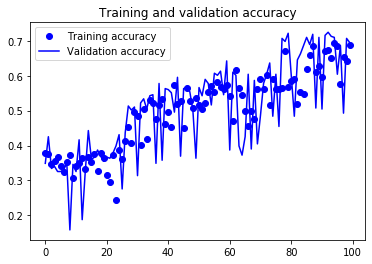

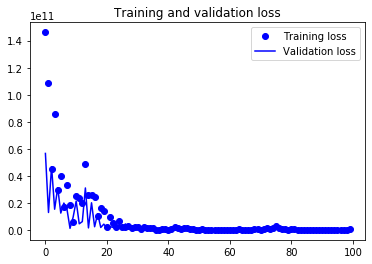

In [137]:
accuracy_rf = rf_train.history['accuracy']
val_accuracy_rf = rf_train.history['val_accuracy']
loss_rf = rf_train.history['loss']
val_loss_rf = rf_train.history['val_loss']
epochs_rf = range(len(accuracy_rf))
plt.plot(epochs_rf, accuracy_rf, 'bo', label='Training accuracy')
plt.plot(epochs_rf, val_accuracy_rf, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs_rf, loss_rf, 'bo', label='Training loss')
plt.plot(epochs_rf, val_loss_rf, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [138]:
predicted_classes_rf = model_rf.predict(x_rf_test)

In [139]:
predicted_classes_rf = np.argmax(np.round(predicted_classes_rf),axis=1)

In [140]:
predicted_classes_rf.shape, y_rf_test.shape

((427,), (427,))

301


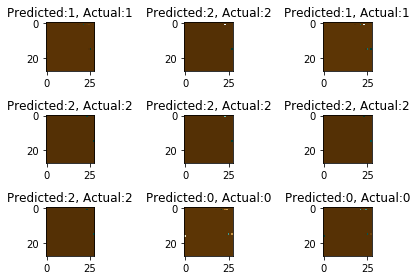

In [141]:
correct_rf = np.where(predicted_classes_rf==y_rf_test)[0]
print(len(correct_rf))
for i, correct_rf in enumerate(correct_rf[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_rf_test[correct_rf].reshape(28,28), cmap='BrBG', interpolation='none')
    plt.title("Predicted:{}, Actual:{}".format(predicted_classes_rf[correct_rf], y_rf_test[correct_rf]))
    plt.tight_layout()

126


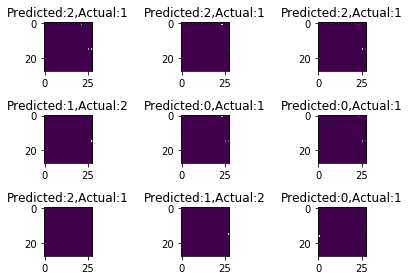

In [142]:
incorrect_rf = np.where(predicted_classes_rf!=y_rf_test)[0]
print(len(incorrect_rf))
for i, incorrect_rf in enumerate(incorrect_rf[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_rf_test[incorrect_rf].reshape(28,28), cmap='PRGn', interpolation='none')
    plt.title("Predicted:{},Actual:{}".format(predicted_classes_rf[incorrect_rf], y_rf_test[incorrect_rf]))
    plt.tight_layout()

In [143]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_rf_test, predicted_classes_rf, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.85      0.92      0.88       153
     Class 1       0.63      0.38      0.47       142
     Class 2       0.60      0.81      0.69       132

    accuracy                           0.70       427
   macro avg       0.70      0.70      0.68       427
weighted avg       0.70      0.70      0.69       427



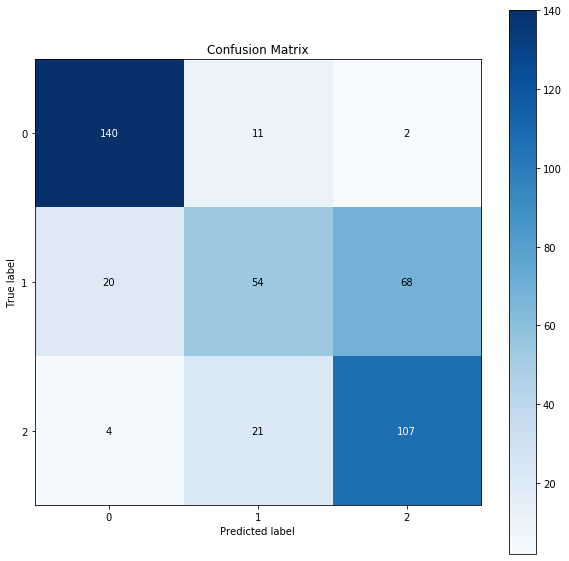

In [144]:
! pip install -q scikit-plot
import scikitplot as skplt
y_pred = np.array(list(map(lambda x: np.argmax(x), model_rf.predict(x_rf_test))))
skplt.metrics.plot_confusion_matrix(
    y_rf_test, 
    y_pred,
    figsize=(10,10))

In [145]:
print("CNN_cor: {:.3f}%".format(test_cor_eval[1] * 100))
print("CNN_chi2: {:.3f}%".format(test_chi_eval[1] * 100))
print("CNN_rfe: {:.3f}%".format(test_rfe_eval[1] * 100))
print("CNN_lr: {:.3f}%".format(test_lr_eval[1] * 100))
print("CNN_rf: {:.3f}%".format(test_rf_eval[1] * 100))

CNN_cor: 96.253%
CNN_chi2: 97.424%
CNN_rfe: 50.117%
CNN_lr: 91.569%
CNN_rf: 70.492%


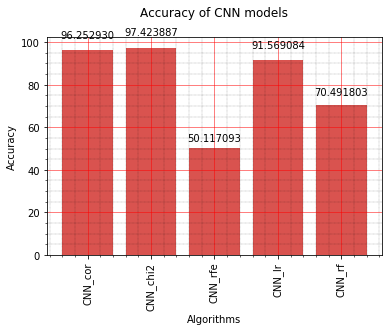

In [146]:
import matplotlib.pyplot as plt
x=['CNN_cor', 'CNN_chi2', 'CNN_rfe', 'CNN_lr', 'CNN_rf']
y = [test_cor_eval[1] * 100, test_chi_eval[1] * 100,test_rfe_eval[1] * 100,test_lr_eval[1] * 100,test_rf_eval[1] * 100]
x_pos = [i for i, _ in enumerate(x)]
fig, ax = plt.subplots()
rects1 = ax.bar(x_pos, y, color='#d9534f')
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Accuracy of CNN models\n")
plt.xticks(x_pos, x,rotation =90)
# Turn on the grid
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth='0.3', color='black')
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%f' % float(height),
        ha='center', va='bottom')
autolabel(rects1)

plt.show()

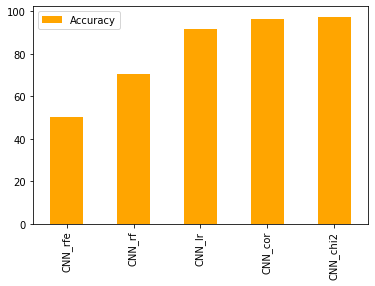

In [147]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame({'' : ['CNN_cor', 'CNN_chi2', 'CNN_rfe', 'CNN_lr', 'CNN_rf'],
'Accuracy' : [test_cor_eval[1] * 100, test_chi_eval[1] * 100,test_rfe_eval[1] * 100,test_lr_eval[1] * 100,test_rf_eval[1] * 100]})
df = df.sort_values('Accuracy')

fig, ax = plt.subplots()
df.plot(kind='bar', x='', y='Accuracy', ax=ax, color='orange')
plt.show()

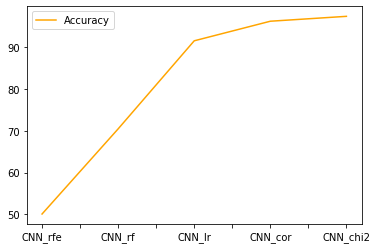

In [148]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.DataFrame({'' : ['CNN_cor', 'CNN_chi2', 'CNN_rfe', 'CNN_lr', 'CNN_rf'],
'Accuracy' : [test_cor_eval[1] * 100, test_chi_eval[1] * 100,test_rfe_eval[1] * 100,test_lr_eval[1] * 100,test_rf_eval[1] * 100]})
df = df.sort_values('Accuracy')
fig, ax = plt.subplots()
df.plot(kind='line', x='', y='Accuracy', ax=ax, color='orange')
plt.show()

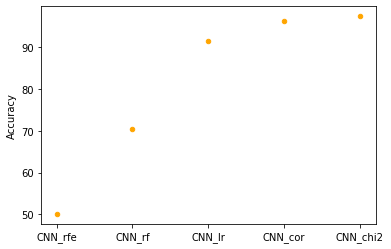

In [149]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.DataFrame({'' : ['CNN_cor', 'CNN_chi2', 'CNN_rfe', 'CNN_lr', 'CNN_rf'],
'Accuracy' : [test_cor_eval[1] * 100, test_chi_eval[1] * 100,test_rfe_eval[1] * 100,test_lr_eval[1] * 100,test_rf_eval[1] * 100]})
df = df.sort_values('Accuracy')
fig, ax = plt.subplots()
df.plot(kind='scatter', x='', y='Accuracy', ax=ax, color='orange')
plt.show()

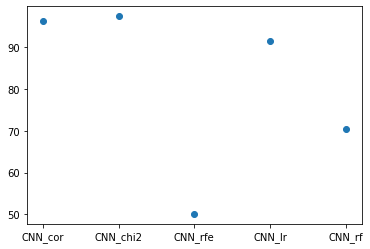

In [150]:
plt.scatter(x,y)

<BarContainer object of 5 artists>

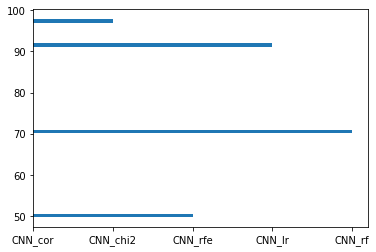

In [151]:
plt.barh(y,x)